In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys, warnings
if not sys.warnoptions: warnings.simplefilter("ignore")
    
pd.set_option('max_columns', 30, 'max_rows', 30)

In [2]:
from sklearn.model_selection import cross_val_score

In [3]:
import tensorflow

In [5]:
import keras

Using TensorFlow backend.


### Feature1

In [2]:
#train = pd.read_csv('../input/X_train.csv',encoding='cp949')
#test = pd.read_csv('../input/X_test.csv',encoding='cp949')
#y_train = pd.read_csv('../input/y_train.csv',encoding='cp949')

train = pd.read_csv('X_train.csv',encoding='cp949')
test = pd.read_csv('X_test.csv',encoding='cp949')
y_train = pd.read_csv('y_train.csv',encoding='cp949').gender

#####################################################
# feature 만든것 집어넣기 위해 빈 리스트 만듦.
feature = []

In [4]:
train.head()

,custid,sales_date,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee
0,0,2000-06-25 00:00:00,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,90000,9000,81000,3,0
1,0,2000-06-25 00:00:00,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,39000,3900,35100,1,0
2,0,2000-08-26 00:00:00,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,175000,17500,157500,3,0
3,0,2000-08-26 00:00:00,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,수입명품,1,455000,45500,409500,3,0
4,0,2000-09-03 00:00:00,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,0,100000,10000,90000,3,0


In [6]:
y_train.head()

0    1
1    1
2    1
3    0
4    0
Name: gender, dtype: int64

In [7]:
data = pd.concat([train,test])
data['sales_date'] = pd.to_datetime(data['sales_date'],format='%Y-%m-%d')
data['month'] = data['sales_date'].dt.month
data['weekday'] = data['sales_date'].dt.dayofweek
data['구매시간대'] = data['sales_time']//100 
data['할인율'] = round(data['dis_amt']/data['tot_amt'],2)
def fx(x):
    if 8<=x<=13:
        return('아침구매')
    elif 14<=x<=18:
        return('오후구매')
    else:
        return('밤구매')
data['구매시간'] = data['구매시간대'].map(fx)
data['pc_nm'] = data['pc_nm'].str.replace('영트렌디','영트랜디')
data['pc_nm'] = data['pc_nm'].str.replace('캐쥬얼','캐주얼')
data['pc_nm'] = data['pc_nm'].str.replace('트레디셔널','트래디셔널')
data['pc_nm'] = data['pc_nm'].str.replace('침구/수예','침구수예')
data['pc_nm'] = data['pc_nm'].str.replace('침구,수예','침구수예')
data['pc_nm'] = data['pc_nm'].str.replace('트랜디 케쥬얼','트래디셔널캐쥬얼')
data['buyer_nm'] = data['buyer_nm'].str.replace('행사장.*','행사장')
data['buyer_nm'] = data['buyer_nm'].str.replace('피혁A','피혁')
data['buyer_nm'] = data['buyer_nm'].str.replace('피혁B','피혁')
data.head()

,custid,sales_date,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee,month,weekday,구매시간대,할인율,구매시간
0,0,2000-06-25,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,90000,9000,81000,3,0,6,6,12,0.1,아침구매
1,0,2000-06-25,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,39000,3900,35100,1,0,6,6,12,0.1,아침구매
2,0,2000-08-26,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,175000,17500,157500,3,0,8,5,18,0.1,오후구매
3,0,2000-08-26,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,수입명품,1,455000,45500,409500,3,0,8,5,18,0.1,오후구매
4,0,2000-09-03,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,0,100000,10000,90000,3,0,9,6,18,0.1,오후구매


In [8]:
data.describe()

,custid,sales_time,goodcd,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee,month,weekday,구매시간대,할인율
count,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06,1.726430e+06
mean,2.490465e+04,1.544808e+03,3.916395e+12,1.346015e-01,9.866935e+04,3.353621e+03,9.531573e+04,1.870374e+00,2.688380e-02,6.533464e+00,3.482283e+00,1.518959e+01,2.702980e-02
std,1.446082e+04,2.461768e+02,9.259838e+11,3.412975e-01,3.152561e+05,1.563967e+04,3.048729e+05,1.282922e+00,1.617439e-01,3.379942e+00,1.935305e+00,2.477512e+00,3.140976e-02
min,0.000000e+00,0.000000e+00,2.101013e+12,0.000000e+00,-7.200000e+07,-1.479000e+06,-7.200000e+07,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.243700e+04,1.340000e+03,2.700000e+12,0.000000e+00,2.243200e+04,0.000000e+00,2.200000e+04,1.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,1.300000e+01,0.000000e+00
50%,2.489000e+04,1.550000e+03,4.202163e+12,0.000000e+00,5.200000e+04,0.000000e+00,5.044000e+04,1.000000e+00,0.000000e+00,6.000000e+00,4.000000e+00,1.500000e+01,0.000000e+00
75%,3.742700e+04,1.740000e+03,4.404830e+12,0.000000e+00,1.192000e+05,3.650000e+03,1.155000e+05,3.000000e+00,0.000000e+00,1.000000e+01,5.000000e+00,1.700000e+01,5.000000e-02
max,4.999400e+04,2.347000e+03,8.801192e+12,1.000000e+00,7.200000e+07,2.301440e+06,7.200000e+07,1.200000e+01,1.000000e+00,1.200000e+01,6.000000e+00,2.300000e+01,6.500000e-01


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726430 entries, 0 to 689776
Data columns (total 22 columns):
custid        int64
sales_date    datetime64[ns]
sales_time    int64
str_nm        object
goodcd        int64
brd_nm        object
corner_nm     object
pc_nm         object
part_nm       object
team_nm       object
buyer_nm      object
import_flg    int64
tot_amt       int64
dis_amt       int64
net_amt       int64
inst_mon      int64
inst_fee      int64
month         int64
weekday       int64
구매시간대         int64
할인율           float64
구매시간          object
dtypes: datetime64[ns](1), float64(1), int64(12), object(8)
memory usage: 302.9+ MB


총 구매금액

In [10]:
a = data.groupby('custid')['net_amt'].agg([('총구매금액',sum)]).reset_index()
feature.append(a)
a.head()

,custid,총구매금액
0,0,1567800
1,1,2715470
2,2,3495760
3,3,2208840
4,4,1023200


총 할인 금액

In [11]:
b = data.query("net_amt>0").groupby('custid')['dis_amt'].agg([('총할인금액',sum)]).reset_index()
b['총할인비율'] = b['총할인금액']/a['총구매금액']
feature.append(b)
b.head()

,custid,총할인금액,총할인비율
0,0,174200,0.111111
1,1,60280,0.022199
2,2,298540,0.085401
3,3,126440,0.057243
4,4,21800,0.021306


구매횟수

In [12]:
a = data.groupby('custid')['str_nm'].agg([('구매횟수','size')]).reset_index()
feature.append(a)
a.head()

,custid,구매횟수
0,0,11
1,1,26
2,2,11
3,3,30
4,4,4


내점일수, 내점당 평균구매액

In [13]:
a = data.query("tot_amt>0").groupby('custid')['sales_date'].nunique().reset_index()
a['내점당구매액']=round(data.query('tot_amt>0').groupby('custid')['net_amt'].agg([('내점당구매액',np.mean)]).reset_index()['내점당구매액']/a['sales_date'],2)
feature.append(a)
a.head()

,custid,sales_date,내점당구매액
0,0,7,20361.04
1,1,16,7343.28
2,2,7,84171.59
3,3,12,8540.65
4,4,2,127900.00


평균 할부개월수

In [14]:
a =data.query("net_amt>0").groupby('custid')['inst_mon'].agg([('평균할부개월수','mean')]).reset_index()
feature.append(a)
a.head()

,custid,평균할부개월수
0,0,2.818182
1,1,2.500000
2,2,3.444444
3,3,2.571429
4,4,4.500000


수입상품 구매비율

In [15]:
a = data.query('net_amt>0').groupby('custid')['import_flg'].agg([('수입상품구매',sum)]).reset_index()
a['수입상품구매비율'] = a['수입상품구매']/data.query('net_amt>0').groupby('custid')['import_flg'].agg([('a',np.size)]).reset_index()['a']
feature.append(a)
a.head()

,custid,수입상품구매,수입상품구매비율
0,0,7,0.636364
1,1,10,0.416667
2,2,1,0.111111
3,3,0,0.000000
4,4,1,0.250000


소분류 

In [16]:
a = pd.pivot_table(index='custid',columns='buyer_nm',values='tot_amt',aggfunc=np.size,fill_value=0,data=data.query("tot_amt>0")[['custid','buyer_nm','tot_amt']]).reset_index()
feature.append(a)
a.head()

buyer_nm,custid,가구,가전,기타바이어,니트단품,도자기크리스탈,디자이너부띠끄,문화완구,생활용품,섬유,수입명품,스포츠,엘레강스캐주얼,영캐주얼,유니캐주얼,유아동복,일반식품,장신구,점외,정장셔츠,조리식품,조리욕실,청과곡물,침구수예,캐릭터캐주얼,타운모피,트래디셔널캐주얼,피혁,행사장,화장품
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,8
1,1,0,1,0,2,0,0,0,0,1,6,1,1,3,0,2,0,1,0,0,0,1,0,0,2,0,0,0,0,3
2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,2,1,0,1
3,3,0,1,0,1,0,0,0,0,1,0,8,0,2,4,1,3,0,0,2,0,1,0,0,1,0,1,1,0,1
4,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1


In [17]:
a = pd.pivot_table(index='custid',columns='pc_nm',values='tot_amt',aggfunc=np.size,fill_value=0,data=data[['custid','pc_nm','tot_amt']]).reset_index()
feature.append(a)
a.head()

pc_nm,custid,(주)현스포츠아쌤,가구,가전,가전/문화,골프,남성잡화,남여구두,내의란제리,농산물,"니트,단품,모피",니트/단품,디자이너부띠끄,디자이너부띠크,디자이너부틱,...,축산물,침구수예,캐릭터정장,캐릭터캐주얼,캐주얼,타운란제리,트래디셔널,트래디셔널캐주얼,트래디셔널캐쥬얼,패션슈즈,패션시즌,피혁A,피혁B,핸드백,화장품
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,8
1,1,0,0,1,0,1,0,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1,0,0,0,0,0,3
2,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,3,0,0,1,0,0,0,0,1
3,3,0,0,0,1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1


할인율별 구매횟수

In [18]:
a = pd.pivot_table(index='custid',columns='할인율',values='tot_amt',aggfunc=np.size,fill_value=0,data=data.query("tot_amt>0")[['custid','할인율','tot_amt']]).reset_index()
feature.append(a)
a.head()

할인율,custid,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.4,0.65
0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0
1,1,15,0,0,0,0,9,0,0,0,0,0,0,0,0
2,2,2,0,0,0,0,0,0,0,0,0,7,0,0,0
3,3,10,0,0,1,1,15,0,0,0,0,1,0,0,0
4,4,2,0,0,0,0,2,0,0,0,0,0,0,0,0


In [19]:
a = a.drop('custid',axis=1).apply(lambda x: x/data.query("tot_amt>0").groupby('custid')['tot_amt'].size()).rename_axis('custid').reset_index()
feature.append(a)
a.head()

할인율,custid,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.4,0.65
0,0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
1,1,0.625000,0.0,0.0,0.000000,0.000000,0.375000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,2,0.222222,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.777778,0.0,0.0,0.0
3,3,0.357143,0.0,0.0,0.035714,0.035714,0.535714,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.0
4,4,0.500000,0.0,0.0,0.000000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


구매시간별 횟수

In [20]:
a = pd.pivot_table(index='custid',columns='구매시간대',values='tot_amt',aggfunc=np.size,fill_value=0,data=data.query("tot_amt>0")[['custid','구매시간대','tot_amt']]).reset_index()
feature.append(a)
a.head()

구매시간대,custid,0,1,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,2,0,0,0,0,0,4,5,0,0,0,0
1,1,0,0,0,0,1,2,2,0,1,4,6,3,4,0,1,0,0,0
2,2,0,0,0,0,1,1,0,1,1,0,1,1,1,2,0,0,0,0
3,3,0,0,0,0,0,2,3,2,3,0,0,5,11,2,0,0,0,0
4,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0


In [21]:
def fx3(x):
    if 9<=x<=17:
        return('퇴근전')
    else:
        return('퇴근후')
data['구매시간유형'] = data['구매시간대'].map(fx3)
a = pd.pivot_table(index='custid',columns='구매시간유형',values='tot_amt',aggfunc=np.size,
                   fill_value=0,data = data.query('tot_amt>0')[['custid','구매시간유형','tot_amt']]).reset_index()
feature.append(a)
a.head()

구매시간유형,custid,퇴근전,퇴근후
0,0,2,9
1,1,19,5
2,2,6,3
3,3,15,13
4,4,4,0


In [22]:
a = a.drop('custid',axis=1).apply(lambda x: x/data.query("tot_amt>0").groupby('custid')['tot_amt'].size()).rename_axis('custid').reset_index()
feature.append(a)
a.head()

구매시간유형,custid,퇴근전,퇴근후
0,0,0.181818,0.818182
1,1,0.791667,0.208333
2,2,0.666667,0.333333
3,3,0.535714,0.464286
4,4,1.000000,0.000000


In [23]:
a = pd.pivot_table(index='custid',columns='구매시간',values='tot_amt',aggfunc=np.size,fill_value=0,data=data.query("tot_amt>0")[['custid','tot_amt','구매시간']]).reset_index()
feature.append(a)
a.head()

구매시간,custid,밤구매,아침구매,오후구매
0,0,5,2,4
1,1,1,5,18
2,2,2,3,4
3,3,2,7,19
4,4,0,0,4


평균 환불금액

In [24]:
a = data.query("net_amt<0").groupby('custid')['net_amt'].agg([('환불횟수',np.size),('평균환불금액',np.mean)]).reset_index()
a['평균환불금액'] = abs(a['평균환불금액'])
a['반품율'] = round(a['환불횟수']/data.query("net_amt>0").groupby('custid')['net_amt'].size(),2)
feature.append(a)
a.head()

,custid,환불횟수,평균환불금액,반품율
0,1,2,52175.0,0.18
1,2,2,903525.0,0.08
2,3,2,330410.0,0.22
3,6,2,31250.0,0.07
4,8,2,84000.0,0.50


계절별 구매 비율

In [25]:
def f1(x):
    if 3 <= x <= 5 :
        return('봄_구매건수')
    elif 6 <= x <= 8 :
        return('여름_구매건수')
    elif 9 <= x <= 11 :    
        return('가을_구매건수')
    else :
        return('겨울_구매건수')    
    
data['season'] = data['month'].apply(f1)
f = pd.pivot_table(data.query("tot_amt>0")[['custid','season','tot_amt']], index='custid', columns='season',values='tot_amt',
                   aggfunc=np.size, fill_value=0).reset_index()
feature.append(f); f

season,custid,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수
0,0,3,3,1,4
1,1,6,1,10,7
2,2,5,2,0,2
3,3,3,6,8,11
4,4,0,0,0,4
5,5,12,1,6,13
6,6,13,2,8,6
7,7,7,12,1,15
8,8,4,2,1,9
9,9,18,11,11,16


In [26]:
def f2(x):
    if x <= 3 :
        return('월화수목_구매건수')
    else :
        return('금토일_구매건수')    
    
data['요일2'] = data['weekday'].map(f2)
f = pd.pivot_table(data.query("tot_amt>0")[['custid','요일2','tot_amt']], index='custid', columns='요일2', values='tot_amt',
                   aggfunc=np.size, fill_value=0).reset_index()
f['금토일_구매비율'] =round(f['금토일_구매건수']/data.query("tot_amt>0").groupby('custid')['tot_amt'].size(),2)
f['월화수목_구매비율'] =round(f['월화수목_구매건수']/data.query("tot_amt>0").groupby('custid')['tot_amt'].size(),2)

feature.append(f); f

요일2,custid,금토일_구매건수,월화수목_구매건수,금토일_구매비율,월화수목_구매비율
0,0,9,2,0.82,0.18
1,1,16,8,0.67,0.33
2,2,5,4,0.56,0.44
3,3,16,12,0.57,0.43
4,4,1,3,0.25,0.75
5,5,14,18,0.44,0.56
6,6,18,11,0.62,0.38
7,7,17,18,0.49,0.51
8,8,13,3,0.81,0.19
9,9,30,26,0.54,0.46


화장품 구매비율

In [27]:
a = data.query("pc_nm == '화장품' and net_amt>0").groupby('custid')['net_amt'].agg([('화장품구매','size'),('화장품구매금액','sum')]).reset_index()
b = data.query("net_amt>0").groupby('custid')['net_amt'].agg([('구매금액','sum'),('구매횟수','size')]).reset_index()
c = pd.merge(b,a,how='left',on='custid').fillna(0)
c['화장품구매비율'] = c['화장품구매']/c['구매횟수']
c['화장품금액비율'] = c['화장품구매금액']/c['구매금액']
a = c[['custid','화장품구매비율','화장품금액비율']]
feature.append(a)
a.head()

,custid,화장품구매비율,화장품금액비율
0,0,0.727273,0.606200
1,1,0.125000,0.056262
2,2,0.111111,0.024779
3,3,0.035714,0.061906
4,4,0.250000,0.055708


In [28]:
X_train = DataFrame({'custid': train.custid.unique()})
for f in feature :
    X_train = pd.merge(X_train, f, how='left',on='custid').fillna(0)
print(X_train)

X_test = DataFrame({'custid': test.custid.unique()})
for f in feature :
    X_test = pd.merge(X_test, f, how='left',on='custid').fillna(0)
IDtest = X_test.custid
print(X_test)

       custid     총구매금액   총할인금액     총할인비율  구매횟수  sales_date     내점당구매액  \
0           0   1567800  174200  0.111111    11           7   20361.04   
1           1   2715470   60280  0.022199    26          16    7343.28   
2           2   3495760  298540  0.085401    11           7   84171.59   
3           3   2208840  126440  0.057243    30          12    8540.65   
4           4   1023200   21800  0.021306     4           2  127900.00   
5           5   4692499  361260  0.076987    32          21    6982.89   
6           6   3469929  315100  0.090809    31          10   12180.79   
7           7   1201252   21930  0.018256    35          23    1492.24   
8           8   1242480   25020  0.020137    18           9    9795.00   
9           9   4742770  235270  0.049606    59          33    2786.66   
10         10   1298340   56830  0.043771    24          15    4159.83   
11         11   7049869  147080  0.020863    66          42    2742.09   
12         12   2501677   97750  0.039

       custid     총구매금액   총할인금액     총할인비율  구매횟수  sales_date     내점당구매액  \
0       30000   2000460   85680  0.042830    27          15    5514.26   
1       30001   4040250  121310  0.030025    27          10   15775.81   
2       30002   7692206  359700  0.046762   100          28    3364.19   
3       30003   1348730   22190  0.016453    43          25    1585.16   
4       30004   2883691    8280  0.002871    55          32    1833.39   
5       30005     54150    2850  0.052632     1           1   54150.00   
6       30006    572100   17650  0.030851     7           5   16345.71   
7       30007    285400   10100  0.035389     6           4   11891.67   
8       30008    393270    6950  0.017672     9           7    9865.54   
9       30009    234900    7100  0.030226     4           2   48650.00   
10      30010   1518500   43100  0.028383    11           4   34511.36   
11      30011   1660257   56620  0.034103    31          16    3503.66   
12      30012   2646500  199300  0.075

### GradientBoosting Classifier

In [122]:
import scipy as sp
from scipy.stats import randint as sp_randint
import scipy.stats
from sklearn.model_selection import RandomizedSearchCV

In [124]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5671441276277093, loss='deviance',
              max_depth=15, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=0.436747263026799,
              min_weight_fraction_leaf=0.0, n_estimators=14,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.5356041734976563, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)
model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1289262976548533, loss='deviance',
              max_depth=8, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=0.3637107709426226,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.634274057957335, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(X_train.drop('custid',axis=1),y_train)
pred0 = model.predict_proba(X_test.drop('custid',axis=1))[:,1]

### XGB Classifier

In [99]:
#!pip install xgboost

In [127]:
from xgboost import XGBClassifier

# parameters = {
#     "learning_rate": sp.stats.uniform(),
#     "max_depth":sp_randint(5,30),
#     "subsample":sp.stats.uniform(),
#     "n_estimators":sp_randint(5,40)
#     }
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06528650438687811,
       max_delta_step=0, max_depth=24, min_child_weight=1, missing=None,
       n_estimators=36, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.1817270377811787)
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.8, gamma=5, learning_rate=0.1, 
                         max_delta_step=0,  max_depth=5, min_child_weight=5, missing=None, n_estimators=100, n_jobs=1, nthread=None,
                         objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                         silent=True, subsample=0.6)
model.fit(X_train.drop('custid',axis=1),y_train)
pred1 = model.predict_proba(X_test.drop('custid',axis=1))[:,1]

### LGBM Classifier

In [101]:
#!pip install lightgbm

In [130]:
from lightgbm import LGBMClassifier

# parameters = {
#     "learning_rate": sp.stats.uniform(),
#     "max_depth":sp_randint(5,30),
#     "subsample":sp.stats.uniform(),
#     "n_estimators":sp_randint(5,40)
#     }
lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.06528650438687811,
        max_depth=24, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=36, n_jobs=-1, num_leaves=31,
        objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=0.1817270377811787,
        subsample_for_bin=200000, subsample_freq=0)
model = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.15896958364551972,
        max_depth=18, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=26, n_jobs=-1, num_leaves=31,
        objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=0.3172017420692961,
        subsample_for_bin=200000, subsample_freq=0)
model.fit(X_train.drop('custid',axis=1),y_train)
pred2 = model.predict_proba(X_test.drop('custid',axis=1).values)[:,1]

In [133]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('gbc', gbc),('xgb', xgb),('lgbm',lgbm)], voting='soft')
pred3 = votingC.fit(X_train.drop('custid',axis=1), y_train).predict_proba(X_test.drop('custid',axis=1))[:,1]

In [104]:
pred_a = (pred1+pred2+pred0+pred3)/4

### Feature1 - scaling

In [135]:
IDtest = X_test.custid;
X_train.drop(['custid'], axis=1, inplace=True)
X_test.drop(['custid'], axis=1, inplace=True)
y_train = pd.read_csv('y_train.csv').gender

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import scipy as sp
from scipy.stats import randint as sp_randint
import scipy.stats
parameters = {
    'loss':['deviance','exponential'],
    "learning_rate": sp.stats.uniform(),
    "min_samples_split": sp.stats.uniform(),
    "max_depth":sp_randint(5,30),
    "subsample":sp.stats.uniform(),
    "n_estimators":sp_randint(5,40)
    }
gbc = GradientBoostingClassifier(random_state=0)
model = RandomizedSearchCV(gbc, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

gbc = GradientBoostingClassifier(random_state=0)
model = RandomizedSearchCV(gbc, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

In [137]:
gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5671441276277093, loss='deviance',
              max_depth=15, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=0.436747263026799,
              min_weight_fraction_leaf=0.0, n_estimators=14,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.5356041734976563, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)
model = GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.1,
              loss='deviance', max_depth=8, max_features='sqrt',
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=0.3545454545454546,
              min_samples_split=0.17272727272727273,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.85, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
model.fit(X_train, y_train)
pred_s1 = model.predict_proba(X_test)[:,1]

### XGBClassifier

from xgboost import XGBClassifier

parameters = {
    "learning_rate": sp.stats.uniform(),
    "max_depth":sp_randint(5,30),
    "subsample":sp.stats.uniform(),
    "n_estimators":sp_randint(5,40)
    }

xgb = XGBClassifier(random_state=0)
model = RandomizedSearchCV(xgb, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

from xgboost import XGBClassifier

parameters= {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

xgb = XGBClassifier(random_state=0)
model = RandomizedSearchCV(xgb, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

In [141]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06528650438687811,
       max_delta_step=0, max_depth=24, min_child_weight=1, missing=None,
       n_estimators=36, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.1817270377811787)
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=5.0, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=100.0, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.5)
model.fit(X_train, y_train)
pred_s2 = model.predict_proba(X_test)[:,1]

### LGBMClassifier

from lightgbm import LGBMClassifier

parameters = {
    "learning_rate": sp.stats.uniform(),
    "max_depth":sp_randint(5,30),
    "subsample":sp.stats.uniform(),
    "n_estimators":sp_randint(5,40)
    }

lgbm = LGBMClassifier(random_state=0)
model = RandomizedSearchCV(lgbm, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

parameters ={
    'num_leaves': sp_randint(6, 50), 
    'min_child_samples': sp_randint(100, 500), 
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'subsample': sp_uniform(loc=0.2, scale=0.8), 
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
    }

lgbm = LGBMClassifier(random_state=0)
model = RandomizedSearchCV(lgbm, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

In [144]:
lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.06528650438687811,
        max_depth=24, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=36, n_jobs=-1, num_leaves=31,
        objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=0.1817270377811787,
        subsample_for_bin=200000, subsample_freq=0)
model = LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.5727212895220026, importance_type='split',
        learning_rate=0.1, max_depth=-1, min_child_samples=221,
        min_child_weight=0.01, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=22, objective=None, random_state=0,
        reg_alpha=5, reg_lambda=50, silent=True,
        subsample=0.6526121033788442, subsample_for_bin=200000,
        subsample_freq=0)
model.fit(X_train, y_train)
pred_s3 = model.predict_proba(X_test)[:,1]

In [147]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('gbc', gbc),('xgb', xgb),('lgbm',lgbm)], voting='soft')
pred_scale = votingC.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [111]:
pred_b = (pred_s2+pred_s3+pred_scale)/3

In [ ]:
max_features = X_train.shape[1]
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler  # StandardScaler 등 다른 Scaler로 바꾸면 어떻게 될까?
#scaler = MinMaxScaler()
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from keras import models
from keras import layers
from keras.optimizers import RMSprop
from keras import regularizers
from keras.callbacks import EarlyStopping

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(max_features,), kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

# batch_size도 성능에 영향을 미친다.
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=25, batch_size=128,
                    validation_split=0.2, callbacks=[EarlyStopping(patience=5)])

In [ ]:
test_loss,test_acc = model.evaluate(X_train, y_train)
print(test_acc)

In [ ]:
pred_z = model.predict(X_test)[:,0]

### Feature2

In [149]:
tr_train = pd.read_csv('X_train.csv', encoding='cp949')
tr_test = pd.read_csv('X_test.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv').gender
#tr_train = pd.read_csv('../input/X_train.csv', encoding='cp949')
#tr_test = pd.read_csv('../input/X_test.csv', encoding='cp949')
tr = pd.concat([tr_train, tr_test])
tr['real_amt']= tr.tot_amt / tr.inst_mon
tr['sdate'] = tr.sales_date.str[:10]
tr['dist_rate'] = (tr['dis_amt']/tr['tot_amt'])*100
tr.loc[456697,"sales_time"] = 1530
tr["time"] = tr['sdate'].astype(str).str.cat(tr["sales_time"].astype(str), sep =" ") 
tr["time"] = pd.to_datetime(tr.time, format='%Y-%m-%d %H%M')

In [150]:
features = []

In [151]:
#평균할인율
f = tr.groupby('custid')['dist_rate'].agg([('dis_rate', 'mean')]).reset_index()
features.append(f)

In [152]:
#평균시간
f = tr.groupby(['custid'])['sales_time'].agg([('sales_time', 'mean')]).reset_index()
features.append(f)

In [153]:
#남성파트
df = tr.groupby(['custid','part_nm'])['tot_amt'].agg([('tot_amt_part', 'sum')]).reset_index()
df['part_nm'] = np.where(df.part_nm.str.contains('남성'), '남성', '비남성')
df = df.pivot_table(values='tot_amt_part', index=df.custid, columns='part_nm', aggfunc='first',fill_value=0).reset_index()
df['남성part'] = (df['남성'] / (df['남성'] + df['비남성'])) * 100
df = df.fillna(0)
features.append(df)

In [154]:
#화장품구매비율
df = tr.groupby(['custid','corner_nm'])['tot_amt'].agg([('tot_amt_corner', 'sum')]).reset_index()
df['corner_nm'] = np.where(df.corner_nm.str.contains('화장품'), '화장품', '비화장품')
df = df.pivot_table(values='tot_amt_corner', index=df.custid, columns='corner_nm', aggfunc='first',fill_value=0).reset_index()
df['화장품비율'] = (df['화장품'] / (df['화장품'] + df['비화장품'])) * 100
df = df.fillna(0)
features.append(df)

In [155]:
#쇼핑시간
df = tr.groupby(['sdate','custid'])['time'].agg([('time', ['min','max'])]).reset_index()
df['shopping_time'] = (df['time']['max'] - df['time']['min']).dt.total_seconds()
df.drop(['sdate','time'], axis=1, inplace=True,level=0)
df = df.groupby(['custid'])['shopping_time'].agg([('shopping_time_mean','mean')]).reset_index()
features.append(df)

In [156]:
#할부대비평균실구매
f = tr.groupby('custid')['real_amt'].agg([('real_amt', 'mean')]).reset_index()
features.append(f)

In [157]:
#평균구매상품종류
df =tr.groupby(['custid','goodcd'])['tot_amt'].agg([('good_count', 'count')]).reset_index()
f = df.groupby(['custid'])['good_count'].agg([('good_count_mean', 'mean')]).reset_index()
features.append(f)

In [158]:
#지역
df = tr.groupby(['custid','str_nm'])['tot_amt'].agg([('tot_amt_str', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_str', index=df.custid, columns='str_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [159]:
#팀별
df = tr.groupby(['custid','team_nm'])['tot_amt'].agg([('tot_amt_team', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_team', index=df.custid, columns='team_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [160]:
#총구매수입상품
df = tr.groupby(['custid'])['import_flg'].agg([('import_flg_sum', 'sum')]).reset_index()
features.append(df)

In [161]:
#월별총구매수입상품
df = tr.groupby(['custid'])['import_flg'].agg([('inst_mon_sum', 'sum')]).reset_index()
features.append(df)

In [162]:
#파트
df = tr.groupby(['custid','part_nm'])['tot_amt'].agg([('tot_amt_part', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_part', index=df.custid, columns='part_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [163]:
#코너
df = tr.groupby(['custid','corner_nm'])['tot_amt'].agg([('tot_amt_corner', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_corner', index=df.custid, columns='corner_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [164]:
#pc
df = tr.groupby(['custid','pc_nm'])['tot_amt'].agg([('tot_amt_pc', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_pc', index=df.custid, columns='pc_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [165]:
#브랜드
df = tr.groupby(['custid','brd_nm'])['tot_amt'].agg([('tot_amt_brd', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_brd', index=df.custid, columns='brd_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [166]:
#구매자
df = tr.groupby(['custid','buyer_nm'])['tot_amt'].agg([('tot_amt_buyer', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_buyer', index=df.custid, columns='buyer_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [167]:
#구매시간
from datetime import timedelta as dt
test = tr.groupby(['custid'])['sales_date'].agg([('sales_date', 'max')]).reset_index()
test['days'] = (pd.to_datetime('2002-01-01') - pd.to_datetime(test.sales_date)).dt.days
test.drop(['sales_date'], axis=1, inplace=True)
features.append(test)

In [168]:
#일평균구매액
test2 = tr.groupby(['sales_date','custid'])['tot_amt'].agg([('day_amt', 'sum')]).reset_index()
test2 = test2.groupby(['custid'])['day_amt'].agg([('일평균구매액', 'mean')]).reset_index()
features.append(test2)

In [169]:
#일평균구매건
df = tr.groupby(['sales_date','custid'])['custid'].agg([('day_visit', 'count')]).reset_index()
f = df.groupby(['custid'])['day_visit'].agg([('일평균구매건', 'mean')]).reset_index()
features.append(f)

In [170]:
#총구매액
f = tr.groupby('custid')['tot_amt'].agg([('총구매액', 'sum')]).reset_index()
features.append(f)

In [171]:
f = tr.groupby('custid')['tot_amt'].agg([('구매건수', 'size')]).reset_index()
features.append(f)

In [172]:
f = tr.groupby('custid')['tot_amt'].agg([('평균구매가격', 'mean')]).reset_index()
features.append(f)

In [173]:
f = tr.groupby('custid')['inst_mon'].agg([('평균할부개월수', 'mean')]).reset_index()
f.iloc[:,1] = f.iloc[:,1].apply(round, args=(1,))
features.append(f)

In [174]:
n = tr.corner_nm.nunique()
f = tr.groupby('custid')['brd_nm'].agg([('구매상품다양성', lambda x: len(x.unique()) / n)]).reset_index()
features.append(f)

In [175]:
tr['sdate'] = tr.sales_date.str[:10]
f = tr.groupby(by = 'custid')['sdate'].agg([('내점일수','nunique')]).reset_index()
features.append(f)

In [176]:
x = tr[tr['import_flg'] == 1].groupby('custid').size() / tr.groupby('custid').size()
f = x.reset_index().rename(columns={0: '수입상품_구매비율'}).fillna(0)
f.iloc[:,1] = (f.iloc[:,1]*100).apply(round, args=(1,))
features.append(f)

In [177]:
def fw(x):
    k = x.dayofweek
    if k <= 4 :
        return('주중_방문')
    else :
        return('주말_방문')    
    
df = tr.copy()
df = df.drop_duplicates(['custid','sales_date'])

df['week'] = pd.to_datetime(df.sales_date).apply(fw)
df = pd.pivot_table(df, index='custid', columns='week', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
df['주말방문비율'] = ((df.iloc[:,1] / (df.iloc[:,1]+df.iloc[:,2]))*100).apply(round, args=(1,))
f = df.copy().iloc[:,[0,-1]]
features.append(f)

In [178]:
def f1(x):
    k = x.month
    if 3 <= k <= 5 :
        return('봄-구매건수')
    elif 6 <= k <= 8 :
        return('여름-구매건수')
    elif 9 <= k <= 11 :    
        return('가을-구매건수')
    else :
        return('겨울-구매건수')    
    
tr['season'] = pd.to_datetime(tr.sales_date).apply(f1)
f = pd.pivot_table(tr, index='custid', columns='season', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
features.append(f)

In [179]:
def f2(x):
    if 9 <= x <= 12 :
        return('아침_구매건수')
    elif 13 <= x <= 17 :
        return('점심_구매건수')
    else :
        return('저녁_구매건수')  # datatime 필드가 시간 형식에 맞지 않은 값을 갖는 경우 저녁시간으로 처리

tr['timeslot'] = tr.sales_date.str.split(' |:', expand=True).iloc[:,1].astype(int).apply(f2)
f = pd.pivot_table(tr, index='custid', columns='timeslot', values='tot_amt', 
                   aggfunc=np.size).reset_index()
features.append(f)

In [180]:
f = tr.groupby('custid').agg({
    'tot_amt': [('최대구매액', 'max')],
    'dis_amt': [('dis_sum', 'sum'),('dis_mean', 'mean')],
    'inst_mon': [('최대할부개월수', 'max')],
    'brd_nm': [('구매상품다양성비', lambda x: x.nunique()/x.count())],
    'import_flg': [('수입상품_구매수', 'sum')],
    'sales_date': [('내점비율',lambda x: x.str[:10].nunique()/x.count())],
    'sales_time': [('밤구입비율', lambda x: np.count_nonzero(x.astype(np.int)[(x>1800)|(x<900)])/ x.count())],
    }).reset_index()
features.append(f)

In [181]:
# 차원축소 매소드 
from sklearn.decomposition import PCA

def dummy_to_pca(tr, column_name:str) :
    max_seq = 300
    max_d = 15
    col_count = tr.groupby(column_name)[column_name].count()
    if len(col_count) > max_seq:
        tops = col_count.sort_values(ascending=False)[0:max_seq].index
        f =tr.loc[tr[column_name].isin(tops)][['custid', column_name]]
    else:
        tops = col_count.index
        f =tr[['custid', column_name]]
    f = pd.get_dummies(f, columns=[column_name])  # This method performs One-hot-encoding
    f = f.groupby('custid').mean()
    if len(tops) < max_d:
        max_d = len(tops)
    pca = PCA(n_components=max_d,random_state=42)
    pca.fit(f)
    cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
    #print(cumsum)
    num_d = np.argmax(cumsum >= 0.99) + 1 # 분산의 설명량이 99%이상 되는 차원의 수
    if num_d == 1:
        num_d = max_d
    pca = PCA(n_components=num_d,random_state=42)    
    result = pca.fit_transform(f)
    result = pd.DataFrame(result)
    result.columns = [column_name + '_' + str(column) for column in result.columns]
    result.index = f.index
    return result.reset_index()

In [182]:
f = dummy_to_pca(tr, 'brd_nm'); features.append(f)
f = dummy_to_pca(tr, 'corner_nm'); features.append(f)
f = dummy_to_pca(tr, 'pc_nm'); features.append(f)
f = dummy_to_pca(tr, 'part_nm'); features.append(f)
f = dummy_to_pca(tr, 'buyer_nm'); features.append(f)
f = dummy_to_pca(tr, 'team_nm'); features.append(f)
f = dummy_to_pca(tr, 'goodcd'); features.append(f)
f = dummy_to_pca(tr, 'str_nm'); features.append(f)
tr['month'] = pd.to_datetime(tr['sales_date']).dt.month.astype(str)
f = dummy_to_pca(tr, 'month'); features.append(f)
tr['week'] = pd.to_datetime(tr['sales_date']).dt.dayofweek.astype(str)
f = dummy_to_pca(tr, 'week'); features.append(f)
tr['time'] = np.floor(tr['sales_time']/100).astype(int).astype(str)
f = dummy_to_pca(tr, 'time'); features.append(f)

In [183]:
X_train = pd.DataFrame({'custid': tr_train.custid.unique()})
for f in features :
    X_train = pd.merge(X_train, f, how='left',on='custid')
display(X_train.shape)

X_test = pd.DataFrame({'custid': tr_test.custid.unique()})
for f in features :
    X_test = pd.merge(X_test, f, how='left',on='custid')
display(X_test.shape)

(30000, 2527)

(19995, 2527)

In [184]:
X_train['평균내점구매액'] = X_train['총구매액']/X_train['내점일수']
X_train['주중방문비율'] = (100 - X_train['주말방문비율'])
X_train['국내상품_구매비율'] = (100 - X_train['수입상품_구매비율'])
X_train['할부구매가격'] = X_train['평균구매가격'] / X_train['평균할부개월수']
X_train['구매상품다양성'] = X_train['총구매액'] / X_train['구매상품다양성']
X_train['주말방문수'] = (X_train['주말방문비율'] * X_train['내점일수']) / 100
X_train['주말방문수'] = X_train['주말방문수'].astype('int64')
X_train['주중방문수'] = X_train['내점일수'] - X_train['주말방문수']
X_train['주중방문수'] = X_train['주중방문수'].astype('int64')
X_train['내점당편균구매건수'] = X_train['구매건수']/X_train['내점일수']
X_train['주중구매액'] = X_train['총구매액']*(X_train['주중방문비율']/100)
X_train['주말구매액'] = X_train['총구매액'] - X_train['주중구매액']

X_test['평균내점구매액'] = X_test['총구매액']/X_test['내점일수']
X_test['주중방문비율'] = (100 - X_test['주말방문비율'])
X_test['국내상품_구매비율'] = (100 - X_test['수입상품_구매비율'])
X_test['할부구매가격'] = X_test['평균구매가격'] / X_test['평균할부개월수']
X_test['구매상품다양성'] = X_test['총구매액'] / X_test['구매상품다양성']
X_test['주말방문수'] = (X_test['주말방문비율'] * X_test['내점일수']) / 100
X_test['주말방문수'] = X_test['주말방문수'].astype('int64')
X_test['주중방문수'] = X_test['내점일수'] - X_test['주말방문수']
X_test['주중방문수'] = X_test['주중방문수'].astype('int64')
X_test['내점당편균구매건수'] = X_test['구매건수']/X_test['내점일수']
X_test['주중구매액'] = X_test['총구매액']*(X_test['주중방문비율']/100)
X_test['주말구매액'] = X_test['총구매액'] - X_test['주중구매액']

In [185]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

IDtest = X_test.custid;
X_train.drop(['custid'], axis=1, inplace=True)
X_test.drop(['custid'], axis=1, inplace=True)
#y_train = pd.read_csv('../input/y_train.csv').gender
y_train = pd.read_csv('y_train.csv').gender

In [186]:
X_train.columns = np.arange(0,len(X_train.columns))
X_test.columns = np.arange(0,len(X_train.columns))

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [188]:
from xgboost import XGBClassifier

In [ ]:
gbc = GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.1,
                           loss='deviance', max_depth=8, max_features='sqrt',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None,
                           min_samples_leaf=0.3545454545454546,
                           min_samples_split=0.17272727272727273,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=5.0, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=100.0, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.5)

voting

In [ ]:
votingC1 = VotingClassifier(estimators=[('gbc', gbc), ('xgb', xgb)], voting='soft', n_jobs=-1)


pred_c = votingC.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [194]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import scipy as sp
from scipy.stats import randint as sp_randint
import scipy.stats
parameters = {
    'loss':['deviance','exponential'],
    "learning_rate": sp.stats.uniform(),
    "min_samples_split": sp.stats.uniform(),
    "max_depth":sp_randint(5,30),
    "subsample":sp.stats.uniform(),
    "n_estimators":sp_randint(5,40)
    }
gbc = GradientBoostingClassifier(random_state=0)
model = RandomizedSearchCV(gbc, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

gbc = GradientBoostingClassifier(random_state=0)
model = RandomizedSearchCV(gbc, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

In [195]:
gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5671441276277093, loss='deviance',
              max_depth=15, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=0.436747263026799,
              min_weight_fraction_leaf=0.0, n_estimators=14,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.5356041734976563, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)
model = GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.1,
              loss='deviance', max_depth=8, max_features='sqrt',
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=0.3545454545454546,
              min_samples_split=0.17272727272727273,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.85, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
model.fit(X_train, y_train)
pred_s1 = model.predict_proba(X_test)[:,1]

### XGBClassifier

from xgboost import XGBClassifier

parameters = {
    "learning_rate": sp.stats.uniform(),
    "max_depth":sp_randint(5,30),
    "subsample":sp.stats.uniform(),
    "n_estimators":sp_randint(5,40)
    }

xgb = XGBClassifier(random_state=0)
model = RandomizedSearchCV(xgb, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

from xgboost import XGBClassifier

parameters= {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

xgb = XGBClassifier(random_state=0)
model = RandomizedSearchCV(xgb, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

In [198]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06528650438687811,
       max_delta_step=0, max_depth=24, min_child_weight=1, missing=None,
       n_estimators=36, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.1817270377811787)
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=5.0, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=100.0, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.5)
model.fit(X_train, y_train)
pred_s2 = model.predict_proba(X_test)[:,1]

### LGBMClassifier

from lightgbm import LGBMClassifier

parameters = {
    "learning_rate": sp.stats.uniform(),
    "max_depth":sp_randint(5,30),
    "subsample":sp.stats.uniform(),
    "n_estimators":sp_randint(5,40)
    }

lgbm = LGBMClassifier(random_state=0)
model = RandomizedSearchCV(lgbm, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

parameters ={
    'num_leaves': sp_randint(6, 50), 
    'min_child_samples': sp_randint(100, 500), 
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'subsample': sp_uniform(loc=0.2, scale=0.8), 
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
    }

lgbm = LGBMClassifier(random_state=0)
model = RandomizedSearchCV(lgbm, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

In [201]:
lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.06528650438687811,
        max_depth=24, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=36, n_jobs=-1, num_leaves=31,
        objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=0.1817270377811787,
        subsample_for_bin=200000, subsample_freq=0)
model = LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.5727212895220026, importance_type='split',
        learning_rate=0.1, max_depth=-1, min_child_samples=221,
        min_child_weight=0.01, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=22, objective=None, random_state=0,
        reg_alpha=5, reg_lambda=50, silent=True,
        subsample=0.6526121033788442, subsample_for_bin=200000,
        subsample_freq=0)
model.fit(X_train, y_train)
pred_s3 = model.predict_proba(X_test)[:,1]

In [204]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('gbc', gbc),('xgb', xgb),('lgbm',lgbm)], voting='soft')
pred_scale = votingC.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [159]:
pred_k = (pred_s1+pred_s2+pred_s3+pred_scale)/4

### Feature3

In [28]:
tr_train = pd.read_csv('X_train.csv', encoding='cp949')
tr_test = pd.read_csv('X_test.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv').gender
#tr_train = pd.read_csv('../input/X_train.csv', encoding='cp949')
#tr_test = pd.read_csv('../input/X_test.csv', encoding='cp949')
tr = pd.concat([tr_train, tr_test])
tr['real_amt']= tr.tot_amt / tr.inst_mon
tr['sdate'] = tr.sales_date.str[:10]
tr['dist_rate'] = (tr['dis_amt']/tr['tot_amt'])*100
tr.loc[456697,"sales_time"] = 1530
features = []
tr["time"] = tr['sdate'].astype(str).str.cat(tr["sales_time"].astype(str), sep =" ") 
tr["time"] = pd.to_datetime(tr.time, format='%Y-%m-%d %H%M')

In [207]:
#평균할인율
f = tr.groupby('custid')['dist_rate'].agg([('dis_rate', 'mean')]).reset_index()
features.append(f)

In [208]:
#평균시간
f = tr.groupby(['custid'])['sales_time'].agg([('sales_time', 'mean')]).reset_index()
features.append(f)

In [209]:
#남성파트
df = tr.groupby(['custid','part_nm'])['tot_amt'].agg([('tot_amt_part', 'sum')]).reset_index()
df['part_nm'] = np.where(df.part_nm.str.contains('남성'), '남성', '비남성')
df = df.pivot_table(values='tot_amt_part', index=df.custid, columns='part_nm', aggfunc='first',fill_value=0).reset_index()
df['남성part'] = (df['남성'] / (df['남성'] + df['비남성'])) * 100
df = df.fillna(0)
features.append(df)

In [210]:
#화장품구매비율
df = tr.groupby(['custid','corner_nm'])['tot_amt'].agg([('tot_amt_corner', 'sum')]).reset_index()
df['corner_nm'] = np.where(df.corner_nm.str.contains('화장품'), '화장품', '비화장품')
df = df.pivot_table(values='tot_amt_corner', index=df.custid, columns='corner_nm', aggfunc='first',fill_value=0).reset_index()
df['화장품비율'] = (df['화장품'] / (df['화장품'] + df['비화장품'])) * 100
df = df.fillna(0)
features.append(df)

In [211]:
#쇼핑시간
df = tr.groupby(['sdate','custid'])['time'].agg([('time', ['min','max'])]).reset_index()
df['shopping_time'] = (df['time']['max'] - df['time']['min']).dt.total_seconds()
df.drop(['sdate','time'], axis=1, inplace=True,level=0)
df = df.groupby(['custid'])['shopping_time'].agg([('shopping_time_mean','mean')]).reset_index()
features.append(df)

In [212]:
#할부대비평균실구매
f = tr.groupby('custid')['real_amt'].agg([('real_amt', 'mean')]).reset_index()
features.append(f)

In [213]:
#평균구매상품종류
df =tr.groupby(['custid','goodcd'])['tot_amt'].agg([('good_count', 'count')]).reset_index()
f = df.groupby(['custid'])['good_count'].agg([('good_count_mean', 'mean')]).reset_index()
features.append(f)

In [214]:
#지역
df = tr.groupby(['custid','str_nm'])['tot_amt'].agg([('tot_amt_str', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_str', index=df.custid, columns='str_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [215]:
#팀별
df = tr.groupby(['custid','team_nm'])['tot_amt'].agg([('tot_amt_team', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_team', index=df.custid, columns='team_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [216]:
#총구매수입상품
df = tr.groupby(['custid'])['import_flg'].agg([('import_flg_sum', 'sum')]).reset_index()
features.append(df)

In [217]:
#월별총구매수입상품
df = tr.groupby(['custid'])['import_flg'].agg([('inst_mon_sum', 'sum')]).reset_index()
features.append(df)

In [218]:
#파트
df = tr.groupby(['custid','part_nm'])['tot_amt'].agg([('tot_amt_part', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_part', index=df.custid, columns='part_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [219]:
#코너
df = tr.groupby(['custid','corner_nm'])['tot_amt'].agg([('tot_amt_corner', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_corner', index=df.custid, columns='corner_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [220]:
#pc
df = tr.groupby(['custid','pc_nm'])['tot_amt'].agg([('tot_amt_pc', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_pc', index=df.custid, columns='pc_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [221]:
#브랜드
df = tr.groupby(['custid','brd_nm'])['tot_amt'].agg([('tot_amt_brd', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_brd', index=df.custid, columns='brd_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [222]:
#구매자
df = tr.groupby(['custid','buyer_nm'])['tot_amt'].agg([('tot_amt_buyer', 'sum')]).reset_index()
df =df.pivot_table(values='tot_amt_buyer', index=df.custid, columns='buyer_nm', aggfunc='first',fill_value=0).reset_index()
features.append(df)

In [223]:
#구매시간
from datetime import timedelta as dt
test = tr.groupby(['custid'])['sales_date'].agg([('sales_date', 'max')]).reset_index()
test['days'] = (pd.to_datetime('2002-01-01') - pd.to_datetime(test.sales_date)).dt.days
test.drop(['sales_date'], axis=1, inplace=True)
features.append(test)

In [224]:
f = tr.groupby('custid')['sales_time'].agg([('평균구매시간', 'mean')]).reset_index()
f.iloc[:,1] = f.iloc[:,1].apply(round, args=(1,))
features.append(f); f

,custid,평균구매시간
0,0,1757.1
1,1,1531.2
2,2,1537.1
3,3,1604.1
4,4,1434.0
5,5,1569.4
6,6,1588.6
7,7,1640.2
8,8,1584.5
9,9,1565.5


In [225]:
f = tr.groupby('custid')['dis_amt'].agg([('평균할인금액', 'mean')]).reset_index()
f.iloc[:,1] = f.iloc[:,1].apply(round, args=(1,))
features.append(f); f

,custid,평균할인금액
0,0,15836.4
1,1,2178.1
2,2,23190.0
3,3,3055.3
4,4,5450.0
5,5,11289.4
6,6,10164.5
7,7,626.6
8,8,1390.0
9,9,3624.6


In [226]:
#일평균구매액
test2 = tr.groupby(['sales_date','custid'])['tot_amt'].agg([('day_amt', 'sum')]).reset_index()
test2 = test2.groupby(['custid'])['day_amt'].agg([('일평균구매액', 'mean')]).reset_index()
features.append(test2)

In [227]:
#일평균구매건
df = tr.groupby(['sales_date','custid'])['custid'].agg([('day_visit', 'count')]).reset_index()
f = df.groupby(['custid'])['day_visit'].agg([('일평균구매건', 'mean')]).reset_index()
features.append(f)

In [228]:
#총구매액
f = tr.groupby('custid')['tot_amt'].agg([('총구매액', 'sum')]).reset_index()
features.append(f)

In [229]:
f = tr.groupby('custid')['tot_amt'].agg([('구매건수', 'size')]).reset_index()
features.append(f)

In [230]:
f = tr.groupby('custid')['tot_amt'].agg([('평균구매가격', 'mean')]).reset_index()
features.append(f)

In [231]:
f = tr.groupby('custid')['inst_mon'].agg([('평균할부개월수', 'mean')]).reset_index()
f.iloc[:,1] = f.iloc[:,1].apply(round, args=(1,))
features.append(f)

In [232]:
n = tr.corner_nm.nunique()
f = tr.groupby('custid')['brd_nm'].agg([('구매상품다양성', lambda x: len(x.unique()) / n)]).reset_index()
features.append(f)

In [233]:
tr['sdate'] = tr.sales_date.str[:10]
f = tr.groupby(by = 'custid')['sdate'].agg([('내점일수','nunique')]).reset_index()
features.append(f)

In [234]:
x = tr[tr['import_flg'] == 1].groupby('custid').size() / tr.groupby('custid').size()
f = x.reset_index().rename(columns={0: '수입상품_구매비율'}).fillna(0)
f.iloc[:,1] = (f.iloc[:,1]*100).apply(round, args=(1,))
features.append(f)

In [235]:
def fw(x):
    k = x.dayofweek
    if k <= 4 :
        return('주중_방문')
    else :
        return('주말_방문')    
    
df = tr.copy()
df = df.drop_duplicates(['custid','sales_date'])

df['week'] = pd.to_datetime(df.sales_date).apply(fw)
df = pd.pivot_table(df, index='custid', columns='week', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
df['주말방문비율'] = ((df.iloc[:,1] / (df.iloc[:,1]+df.iloc[:,2]))*100).apply(round, args=(1,))
f = df.copy().iloc[:,[0,-1]]
features.append(f)

In [236]:
def f1(x):
    k = x.month
    if 3 <= k <= 5 :
        return('봄-구매건수')
    elif 6 <= k <= 8 :
        return('여름-구매건수')
    elif 9 <= k <= 11 :    
        return('가을-구매건수')
    else :
        return('겨울-구매건수')    
    
tr['season'] = pd.to_datetime(tr.sales_date).apply(f1)
f = pd.pivot_table(tr, index='custid', columns='season', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
features.append(f)

In [33]:
def f2(x):
    if 9 <= x <= 12 :
        return('아침_구매건수')
    elif 13 <= x <= 17 :
        return('점심_구매건수')
    else :
        return('저녁_구매건수')  # datatime 필드가 시간 형식에 맞지 않은 값을 갖는 경우 저녁시간으로 처리

tr['timeslot'] = tr.sales_date.str.split(' |:', expand=True).iloc[:,1].astype(int).apply(f2)
f = pd.pivot_table(tr, index='custid', columns='timeslot', values='tot_amt', 
                   aggfunc=np.size).reset_index()
features.append(f)

In [238]:
f = tr.groupby('custid')['corner_nm'].agg([('주구매코너', lambda x: x.value_counts().index[0])]).reset_index()
f = pd.get_dummies(f, columns=['주구매코너'])  # This method performs One-hot-encoding
features.append(f)

In [239]:
X_train = pd.DataFrame({'custid': tr_train.custid.unique()})
for f in features :
    X_train = pd.merge(X_train, f, how='left',on='custid')
display(X_train.shape)

X_test = pd.DataFrame({'custid': tr_test.custid.unique()})
for f in features :
    X_test = pd.merge(X_test, f, how='left',on='custid')

(30000, 2693)

In [240]:
X_train['평균내점구매액'] = X_train['총구매액']/X_train['내점일수']
X_train['주중방문비율'] = (100 - X_train['주말방문비율'])
X_train['국내상품_구매비율'] = (100 - X_train['수입상품_구매비율'])
X_train['할부구매가격'] = X_train['평균구매가격'] / X_train['평균할부개월수']
X_train['구매상품다양성'] = X_train['총구매액'] / X_train['구매상품다양성']
X_train['주말방문수'] = (X_train['주말방문비율'] * X_train['내점일수']) / 100
X_train['주말방문수'] = X_train['주말방문수'].astype('int64')
X_train['주중방문수'] = X_train['내점일수'] - X_train['주말방문수']
X_train['주중방문수'] = X_train['주중방문수'].astype('int64')
X_train['내점당편균구매건수'] = X_train['구매건수']/X_train['내점일수']
X_train['주중구매액'] = X_train['총구매액']*(X_train['주중방문비율']/100)
X_train['주말구매액'] = X_train['총구매액'] - X_train['주중구매액']

In [241]:
X_test['평균내점구매액'] = X_test['총구매액']/X_test['내점일수']
X_test['주중방문비율'] = (100 - X_test['주말방문비율'])
X_test['국내상품_구매비율'] = (100 - X_test['수입상품_구매비율'])
X_test['할부구매가격'] = X_test['평균구매가격'] / X_test['평균할부개월수']
X_test['구매상품다양성'] = X_test['총구매액'] / X_test['구매상품다양성']
X_test['주말방문수'] = (X_test['주말방문비율'] * X_test['내점일수']) / 100
X_test['주말방문수'] = X_test['주말방문수'].astype('int64')
X_test['주중방문수'] = X_test['내점일수'] - X_test['주말방문수']
X_test['주중방문수'] = X_test['주중방문수'].astype('int64')
X_test['내점당편균구매건수'] = X_test['구매건수']/X_test['내점일수']
X_test['주중구매액'] = X_test['총구매액']*(X_test['주중방문비율']/100)
X_test['주말구매액'] = X_test['총구매액'] - X_test['주중구매액']

In [242]:
X_train["평균할인율"] = (X_train["평균할인금액"] / X_train["평균구매가격"])*100
X_test["평균할인율"] = (X_test["평균할인금액"] / X_test["평균구매가격"])*100

def f1(x):
    if  x <= 2000000 :
        return('1')
    elif 2000001 <= x < 5000000 :
        return('2')
    else :
        return('3')  

X_train['총구매액B'] = X_train.총구매액.apply(f1)
X_train['총구매액B'] = X_train['총구매액B'].astype(int)

def f1(x):
    if  x <= 2000000 :
        return('1')
    elif 2000001 <= x < 5000000 :
        return('2')
    else :
        return('3')  

X_test['총구매액B'] = X_test.총구매액.apply(f1)
X_test['총구매액B'] = X_test['총구매액B'].astype(int)

def f1(x):
    if  x <= 2000000 :
        return('1')
    elif 2000001 <= x < 5000000 :
        return('2')
    else :
        return('3')  

X_test['총구매액B'] = X_test.총구매액.apply(f1)
X_test['총구매액B'] = X_test['총구매액B'].astype(int)

def f1(x):
    if  x <= 1500 :
        return('4')
    elif 1501 <= x < 1600 :
        return('3')
    elif 1601 <= x < 1700 :
        return('2')
    else :
        return('1')  

X_train['평균구매시간B'] = X_train.평균구매시간.apply(f1)
X_train['평균구매시간B'] = X_train['평균구매시간B'].astype(int)

def f1(x):
    if  x <= 1500 :
        return('4')
    elif 1501 <= x < 1600 :
        return('3')
    elif 1601 <= x < 1700 :
        return('2')
    else :
        return('1')  

X_test['평균구매시간B'] = X_test.평균구매시간.apply(f1)
X_test['평균구매시간B'] = X_test['평균구매시간B'].astype(int)

def f1(x):
    if  x <= 2 :
        return('1')
    elif 2.0001 <= x < 3 :
        return('2')
    elif 3.0001 <= x < 4 :
        return('3')
    elif 4.0001 <= x < 5 :
        return('4')
    else :
        return('5')  

X_train['평균할인율B'] = X_train.평균할인율.apply(f1)
X_train['평균할인율B'] = X_train['평균할인율B'].astype(int)

def f1(x):
    if  x <= 2 :
        return('1')
    elif 2.0001 <= x < 3 :
        return('2')
    elif 3.0001 <= x < 4 :
        return('3')
    elif 4.0001 <= x < 5 :
        return('4')
    else :
        return('5')  

X_test['평균할인율B'] = X_test.평균할인율.apply(f1)
X_test['평균할인율B'] = X_test['평균할인율B'].astype(int)

X_train['구매_시간'] = X_train['총구매액B'] * X_train['평균구매시간B']
X_train['구매_할인'] = X_train['총구매액B'] * X_train['평균할인율B']
X_train['할인_시간'] = X_train['평균구매시간B'] * X_train['평균할인율B']
X_test['구매_시간'] = X_test['총구매액B'] * X_test['평균구매시간B']
X_test['구매_할인'] = X_test['총구매액B'] * X_test['평균할인율B']
X_test['할인_시간'] = X_test['평균구매시간B'] * X_test['평균할인율B']

X_train.clip(lower=0,inplace=True)

In [51]:
X_train = pd.read_csv('feature3_train.csv', encoding = 'UTF-8')
X_test = pd.read_csv('feature3_test.csv', encoding = 'UTF-8')
y_train = pd.read_csv('y_train.csv').gender

In [52]:
IDtest = X_test.custid;
X_train.drop(['custid'], axis=1, inplace=True)
X_test.drop(['custid'], axis=1, inplace=True)

In [53]:
X_train.columns = np.arange(0,len(X_train.columns))
X_test.columns = np.arange(0,len(X_train.columns))
max_features = X_train.shape[1]

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {'loss' : "deviance",
              'max_depth': 8,
              'min_samples_leaf': 100,
              'max_features': 0.3 
              } 
GBC = GradientBoostingClassifier(**parameters, random_state=123)

In [55]:
from xgboost import XGBClassifier
parameters = {'xgb__max_depth': 4, 'xgb__subsample': 0.7,'gamma': 2}
clf = XGBClassifier(**parameters, random_state=123, n_jobs=-1)

In [56]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.06528650438687811,
        max_depth=24, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=36, n_jobs=-1, num_leaves=31,
        objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=0.1817270377811787,
        subsample_for_bin=200000, subsample_freq=0)

In [57]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('clf', clf), ('gbc', GBC),('lgbm', lgbm)], voting='soft', n_jobs=-1)
pred0 = votingC.fit(X_train, y_train).predict_proba(X_test)[:,1]

### Feature4 (min-max scaler)

In [13]:
tr_train = pd.read_csv('X_train.csv', encoding='cp949')
tr_test = pd.read_csv('X_test.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv').gender
#tr_train = pd.read_csv('../input/X_train.csv', encoding='cp949')
#tr_test = pd.read_csv('../input/X_test.csv', encoding='cp949')
tr = pd.concat([tr_train, tr_test])
tr['real_amt']= tr.tot_amt / tr.inst_mon
tr['sdate'] = tr.sales_date.str[:10]
tr['dist_rate'] = (tr['dis_amt']/tr['tot_amt'])*100
tr.loc[456697,"sales_time"] = 1530
features = []
tr["time"] = tr['sdate'].astype(str).str.cat(tr["sales_time"].astype(str), sep =" ") 
tr["time"] = pd.to_datetime(tr.time, format='%Y-%m-%d %H%M')

In [11]:
IDtest = X_test.custid

In [14]:
tr['dist_rate'] = (tr['dis_amt']/tr['tot_amt'])*100

In [15]:
df = tr.groupby(['custid'])['sales_time'].agg([('sales_time', 'mean')]).reset_index()

In [16]:
def f4(x):
    if x <= 978 :
        return('st_cat01')
    elif 979 <= x <= 1464 :
        return('st_cat02')
    elif 1465 <= x <= 1564 :
        return('st_cat03')
    elif 1565 <= x <= 1658 :
        return('st_cat04')
    else :
        return('st_cat05')  # datatime 필드가 시간 형식에 맞지 않은 값을 갖는 경우 저녁시간으로 처리
df['sale_ct'] = df.sales_time.apply(f4)
df.drop(['sales_time'], axis=1, inplace=True)
df = pd.get_dummies(df, columns=['sale_ct'])
train_1 = df.query('custid not in @IDtest').drop(columns=['custid'])
test_1 = df.query('custid in @IDtest').drop(columns=['custid'])

In [17]:
df = tr.groupby(['custid'])['dist_rate'].agg([('dist_amt', 'mean')]).reset_index()

In [18]:
def f3(x):
    if x <= 0 :
        return('cat01')
    elif 1 <= x <= 1.83 :
        return('cat02')
    elif 1.84 <= x <= 2.83 :
        return('cat03')
    elif 2.84 <= x <= 3.92 :
        return('cat04')
    else :
        return('cat05')  # datatime 필드가 시간 형식에 맞지 않은 값을 갖는 경우 저녁시간으로 처리
df['dist'] = df.dist_amt.apply(f3)
df.drop(['dist_amt'], axis=1, inplace=True)
df = pd.get_dummies(df, columns=['dist'])

In [19]:
train_2 = df.query('custid not in @IDtest').drop(columns=['custid'])
test_2 = df.query('custid in @IDtest').drop(columns=['custid'])

In [20]:
def f2(x):
    if 9 <= x <= 12 :
        return('아침_구매건수')
    elif 13 <= x <= 17 :
        return('점심_구매건수')
    else :
        return('저녁_구매건수')  # datatime 필드가 시간 형식에 맞지 않은 값을 갖는 경우 저녁시간으로 처리
    
tr['sales_hour'] = tr.sales_time.map(lambda x : np.int(str(x)[:2]))
tr['timeslot'] = tr['sales_hour'].apply(f2)

In [21]:
#def f2(x):
#    k = x.hour
#    if 9 <= k <= 12 :
#        return('아침_구매건수')
#    elif 13 <= k <= 17 :
#        return('점심_구매건수')
#    else :
#        return('저녁_구매건수')  # datatime 필드가 시간 형식에 맞지 않은 값을 갖는 경우 저녁시간으로 처리
#
#tr['timeslot'] = tr.time.apply(f2)

In [22]:
def f1(x):
    k = x.month
    if 3 <= k <= 5 :
        return('봄-구매건수')
    elif 6 <= k <= 8 :
        return('여름-구매건수')
    elif 9 <= k <= 11 :    
        return('가을-구매건수')
    else :
        return('겨울-구매건수')    
    
tr['season'] = tr.time.apply(f1)

In [23]:
def fw(x):
    k = x.dayofweek
    if k <= 4 :
        return('주중_방문')
    else :
        return('주말_방문')    
    
tr['week'] = tr.time.apply(fw)

In [24]:
def f2(x):
    if 9 <= x <= 12 :
        return('아침_구매건수')
    elif 13 <= x <= 17 :
        return('점심_구매건수')
    else :
        return('저녁_구매건수')  # datatime 필드가 시간 형식에 맞지 않은 값을 갖는 경우 저녁시간으로 처리

tr['timeslot'] = tr.sales_date.str.split(' |:', expand=True).iloc[:,1].astype(int).apply(f2)
f = pd.pivot_table(tr, index='custid', columns='timeslot', values='tot_amt', 
                   aggfunc=np.size).reset_index()
features.append(f)

In [25]:
tr['sales_hour'] = tr['sales_time']//100;
tr['sales_wkday'] = pd.to_datetime(tr.sales_date).dt.weekday

def makeBOW(col):
    
    f = lambda x: np.where(len(x) >=1, 1, 0)

    train = pd.pivot_table(tr, index='custid', columns=col, values='tot_amt',
                             aggfunc=f, fill_value=0).reset_index(). \
                             query('custid not in @IDtest').drop(columns=['custid'])
    test = pd.pivot_table(tr, index='custid', columns=col, values='tot_amt',
                             aggfunc=f, fill_value=0).reset_index(). \
                             query('custid in @IDtest').drop(columns=['custid'])
    return train, test
train1, test1 = makeBOW('brd_nm')
train2, test2 = makeBOW('corner_nm')
train3, test3 = makeBOW('sales_hour')
train4, test4 = makeBOW('sales_wkday')
train5, test5 = makeBOW('timeslot')
train6, test6 = makeBOW('week')
train7, test7 = makeBOW('season')
#train6, test6 = makeBOW('dis_rate_ca')
X_train = pd.concat([train1, train2, train3,train4,train5,train6,train7,train_1,train_2], axis=1).values
X_test = pd.concat([test1, test2, test3,test4,test5,test6,test7,test_1,test_2], axis=1).values
max_features = X_train.shape[1]

In [33]:
X_test.shape

(19995, 2257)

In [29]:
X_train = pd.DataFrame(X_train)

In [31]:
X_test = pd.DataFrame(X_test)

In [30]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
from xgboost import XGBClassifier
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.8, gamma=5, learning_rate=0.1, 
                         max_delta_step=0,  max_depth=5, min_child_weight=5, missing=None, n_estimators=100, n_jobs=1, nthread=None,
                         objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                         silent=True, subsample=0.6)

In [35]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

In [36]:
X4 = pd.concat([X_train, X_test])

In [37]:
X4.shape

(49995, 2257)

In [38]:
len(list(X_train.columns))

2257

In [39]:
list(clf.feature_importances_)

[0.0025820544,
 0.0019750325,
 0.0,
 0.0,
 0.001880151,
 0.0,
 0.0,
 0.0031223933,
 0.0019480584,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0013022046,
 0.0,
 0.0013789493,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002191915,
 0.0,
 0.001369106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0018951868,
 0.0,
 0.0018441537,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0012840985,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0013234492,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0013838464,
 0.0,
 0.002007503,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0028503395,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0014010763,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0015471643,
 0.0017645833,
 0.0,
 0.0,
 0.0,
 0.0019697314,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0019490329,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0013605114,
 0.0,
 0.0025247182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00

In [40]:
imp_4 = pd.DataFrame(list(clf.feature_importances_),index = list(X_train.columns))

In [41]:
imp_4.head()

,0
0,0.002582
1,0.001975
2,0.000000
3,0.000000
4,0.001880


In [42]:
for i in range(len(X4.columns)) :
    if imp_4.iloc[i,0] == 0 :
        X4.drop(imp_4.iloc[i,:].name, axis=1, inplace=True)
    else :
        pass

In [43]:
X4.shape

(49995, 488)

In [44]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
X_train = X4.iloc[0:30000,]
X_train.shape

(30000, 488)

In [46]:
X_test = X4.iloc[30000:,]
X_test.shape

(19995, 488)

In [47]:
X_train.to_csv('feature4_train.csv', index=False)
X_test.to_csv('feature4_test.csv', index=False)

In [86]:
X_train = pd.read_csv('feature4_train.csv', encoding = 'UTF-8')
X_test = pd.read_csv('feature4_test.csv', encoding = 'UTF-8')

In [87]:
X_train.head()

,0,1,4,7,8,13,15,20,22,31,33,40,51,67,69,...,2237,2238,2239,2242,2243,2244,2246,2248,2249,2250,2251,2253,2254,2255,2256
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### min-max scaler

In [90]:
max_features = X_train.shape[1]

In [88]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler 등 다른 Scaler로 바꾸면 어떻게 될까?
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
from xgboost import XGBClassifier
parameters = {'n_estimators': 300, 'learning_rate': 0.1}
model = XGBClassifier(**parameters, random_state=123,  n_jobs=-1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [50]:
pred1 = model.predict_proba(X_test)[:,1]

In [58]:
pred_d = (pred0+pred1) / 2

In [59]:
pred_d = pd.concat([IDtest, pd.Series(pred_d, name="gender")] ,axis=1)
pred_d.to_csv('pred_d.csv', index=False)

In [97]:
from keras import models
from keras import layers
from keras.optimizers import RMSprop
from keras import regularizers
from keras.callbacks import EarlyStopping

model3 = models.Sequential()
model3.add(layers.Dense(256, activation='relu', input_shape=(max_features,), kernel_regularizer=regularizers.l2(0.03))) # 연산량이 적고 학습속도가 빠르고 효과가 좋음
#model3.add(layers.Dense(64, activation='relu'))
#model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()

# batch_size도 성능에 영향을 미친다.
model3.compile(optimizer=RMSprop(lr=0.00005), loss='binary_crossentropy', metrics=['acc'])
history = model3.fit(X_train, y_train, epochs=20, batch_size=128, 
                    validation_split=0.2, callbacks=[EarlyStopping(patience=5)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 256)               125184    
_________________________________________________________________
dense_59 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 33        
Total params: 133,441
Trainable params: 133,441
Non-trainable params: 0
_________________________________________________________________
Train on 24000 samples, validate on 6000 samples
Epoch 1/20
24000/24000 [==============================] - 5s 188us/step - loss: 9.1745 - acc: 0.6954 - val_loss: 7.8351 - val_acc: 0.6982
Epoch 2/20
24000/24000 [==============================] - 2s 88us/step - loss: 6.7106 - acc: 0.6958 - val_loss: 5.6554 - val_acc: 0.6992
Epoch 3/20
24000/24000 [==============================] - 2s 79us/step - los

In [98]:
test_loss,test_acc = model3.evaluate(X_train, y_train)

30000/30000 [==============================] - 3s 84us/step


In [99]:
print(test_acc)

0.7172333333333333


In [100]:
pred5 = model3.predict(X_test)[:,0]

In [101]:
pred5 = pd.concat([IDtest, pd.Series(pred5, name="gender")] ,axis=1)
pred5.to_csv('pred5.csv', index=False)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")
%matplotlib inline

### Feature5

In [9]:
tr_train = pd.read_csv('X_train.csv', encoding='cp949')
tr_test = pd.read_csv('X_test.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv', encoding='cp949')

#tr_train = pd.read_csv('../input/X_train.csv', encoding='cp949')
#tr_test = pd.read_csv('../input/X_test.csv', encoding='cp949')
#y_train = pd.read_csv('../input/y_train.csv', encoding='cp949')
# floor_info = pd.read_csv('floor-info/floor_info.csv', encoding='cp949')
train = pd.merge(tr_train, y_train, how='left')
tr = pd.concat([tr_train, tr_test])
features = {}

In [10]:
y_train = pd.read_csv('y_train.csv', encoding='cp949').gender

In [11]:
f = tr.groupby('custid')['tot_amt'].agg([('구매건수', 'size')]).reset_index()
features['구매건수'] = f

In [12]:
f = tr.groupby('custid')['tot_amt'].agg([('평균구매액', 'mean')]).reset_index()
features['평균구매액'] = f

In [13]:
n = tr.corner_nm.nunique()
f = tr.groupby('custid')['brd_nm'].agg([('구매브랜드다양성', lambda x: len(x.unique()) / n)]).reset_index()
features['구매브랜드다양성'] = f

In [14]:
tr['sdate'] = tr.sales_date.str[:10]
f = tr.groupby(by = 'custid')['sdate'].agg([('내점일수','nunique')]).reset_index()
features['내점일수'] = f

In [15]:
x = tr[tr['import_flg'] == 1].groupby('custid').size() / tr.groupby('custid').size()
f = x.reset_index().rename(columns={0: '수입상품_구매비율'}).fillna(0)
f.iloc[:,1] = (f.iloc[:,1]*100).apply(round, args=(1,))
features['수입상품구매비율'] = f

In [16]:
def wt(x) :
    w = pd.to_datetime(x.sales_date[:10]).dayofweek
    w = { 0:"MON_", 1:"TUE_", 2:"WEN_", 3:"THU_", 4:"FRI_", 5:"SAT_", 6:"SUN_" }.get(w, 6)
    t = np.int(str(x.sales_time)[:2])
    
    if 9 <= t <= 12 :
        t = 'MORNING_구매건수'
    elif 13 <= t <= 17 :
        t = 'LUNCH_구매건수'
    else :
        t = 'DINNER_구매건수'
    return w + t
tr['week_time'] = tr.apply(wt, axis=1)
f = tr[['custid','week_time']]
f.columns = ["custid", "week_time"]
f= f.groupby('custid')['week_time'].value_counts().unstack(level=1).fillna(0).astype(int).reset_index()
features['요일-아침점심저녁별구매건수'] =f;

In [17]:
def wt2(x) :
    w = pd.to_datetime(x.sales_date[:10]).dayofweek
    w = { 0:"MON_", 1:"TUE_", 2:"WEN_", 3:"THU_", 4:"FRI_", 5:"SAT_", 6:"SUN_" }.get(w, 6)
    t = str(x.sales_time)[:2]
    return w + t
tr['week_time'] = tr.apply(wt2, axis=1)
f = tr[['custid','week_time']]
f.columns = ["custid", "week_time"]
f = f.groupby('custid')['week_time'].value_counts().unstack(level=1).fillna(0).astype(int).reset_index()
features['요일-시간대별구매건수'] =f;

In [18]:
tr['timeslot'] = tr.sales_time.map(lambda x : "{}시_구매건수".format(str(x)[:2]))
f = pd.pivot_table(tr, index='custid', columns='timeslot', values='tot_amt', 
                   aggfunc=np.size).fillna(0).astype(int).reset_index()
features['시간대별구매건수'] = f;
tr['timeslot'] = tr.sales_time.map(lambda x : "{}_구매건수".format(str(x)))
f = pd.pivot_table(tr, index='custid', columns='timeslot', values='tot_amt', 
                   aggfunc=np.size).fillna(0).astype(int).reset_index()
features['분단위구매건수'] = f;
def f1(x):
    if 9 <= x <= 11 :
        return('911_구매건수')
    elif 11 <= x <= 13 :
        return('1113_구매건수')
    elif 13 <= x <= 17 :
        return('1317_구매건수')
    elif 17 <= x <= 22 :
        return('1722_구매건수')
    else :
        return('기타_구매건수')  
    
tr['sales_hour'] = tr.sales_time.map(lambda x : np.int(str(x)[:2]))
tr['timeslot'] = tr['sales_hour'].apply(f1)
f = pd.pivot_table(tr, index='custid', columns='timeslot', values='tot_amt', 
                   aggfunc=np.size).fillna(0).astype(int).reset_index()
features['5단위시간대별구매건수'] = f.head(2)
def f2(x):
    if 9 <= x <= 12 :
        return('아침_구매건수')
    elif 13 <= x <= 17 :
        return('점심_구매건수')
    else :
        return('저녁_구매건수')  # datatime 필드가 시간 형식에 맞지 않은 값을 갖는 경우 저녁시간으로 처리
    
tr['sales_hour'] = tr.sales_time.map(lambda x : np.int(str(x)[:2]))
tr['timeslot'] = tr['sales_hour'].apply(f2)
f = pd.pivot_table(tr, index='custid', columns='timeslot', values='tot_amt', 
                   aggfunc=np.size).fillna(0).astype(int).reset_index()
features['아침점심저녁구매건수'] = f

In [19]:
def f1(x):
    m = x.month
    if x.day<=10 :
        h = "초순"
    elif x.day<=20 :
        h = "중순"
    else :
        h = "하순"  
    return "{}월{}_구매건수".format(m,h)

tr['season'] = pd.to_datetime(tr.sales_date).apply(f1)
f = pd.pivot_table(tr, index='custid', columns='season', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
features['세분화계절별구매건수'] = f

In [20]:
def f2(x):
    if 9 <= x <= 12 :
        return('아침_구매건수')
    elif 13 <= x <= 17 :
        return('점심_구매건수')
    else :
        return('저녁_구매건수')  # datatime 필드가 시간 형식에 맞지 않은 값을 갖는 경우 저녁시간으로 처리
    
tr['sales_hour'] = tr.sales_time.map(lambda x : np.int(str(x)[:2]))
tr['timeslot'] = tr['sales_hour'].apply(f2)
f = pd.pivot_table(tr, index='custid', columns='timeslot', values='tot_amt', 
                   aggfunc=np.size).fillna(0).astype(int).reset_index()
features['아침점심저녁구매건수'] = f;

In [21]:
def time_transfer(x) :
    hour = np.int(str(x)[:2])
    time = hour * 60
    minute = x%100
    time = time + minute
    return time

tr['sale_time_trans'] = tr.sales_time.map(time_transfer)

tr['sdate'] = tr.sales_date.str[:10]
f = tr.groupby(['custid','sdate'])['sale_time_trans'].agg([('입점시간','min')]).reset_index()
f1 = f
f = tr.groupby(['custid','sdate'])['sale_time_trans'].agg([('퇴점시간','max')]).reset_index()
f2 = f
f = pd.merge(f1,f2,how='left')
f['체류시간'] = f.퇴점시간 - f.입점시간 + 30 #처음구매시점보다 15분전, 마지막구매시점보다 15분후 퇴점이라고 가정함.
f = f.loc[f.체류시간!=0]
f=f.groupby('custid')['체류시간'].agg({"평균체류시간":'mean'}).reset_index()
custid_col = tr[['custid']].drop_duplicates().reset_index(drop=True)
f = pd.merge(custid_col, f, how='left')
f = f.fillna(30).astype(int)
features['예상체류시간'] = f;

In [22]:
tr['sdate'] = tr.sales_date.str[:10]
f = tr.groupby(['custid','sdate'])['tot_amt'].agg({"구매제품수":'count'}).reset_index().drop("sdate", axis=1)
f = f.groupby("custid")['구매제품수'].agg({"방문당평균구매제품수":'mean'}).reset_index()
features["방문당평균구매제품수"] = f;

In [23]:
tr['sdate'] = tr.sales_date.str[:10]
def visit_period(x) :
    max_date = pd.to_datetime(x.max()).to_julian_date()
    min_date = pd.to_datetime(x.min()).to_julian_date()
    return max_date - min_date
f = tr.groupby('custid')['sdate'].agg({"총방문기간":visit_period})
features["총방문기간"] = f;

In [24]:
tr['sdate'] = tr.sales_date.str[:10]
def visit_cycle(x) :
    max_date = pd.to_datetime(x.max()).to_julian_date()
    min_date = pd.to_datetime(x.min()).to_julian_date()
    visit_count = x.count()
    return (max_date - min_date)/visit_count
f = tr.groupby('custid')['sdate'].agg({'평균방문주기':visit_cycle})
features["평균방문주기"] = f;

In [25]:
f = tr.pivot_table("tot_amt","custid","corner_nm", aggfunc="count").fillna(0).astype(int).reset_index()
features['구매코너별_구매건수'] = f;

In [26]:
g = train.pivot_table('tot_amt','brd_nm','gender', aggfunc="count").fillna(0).astype(int)
g['women_rate'] = g[0] / g.sum(axis=1)
g = g.sort_values(ascending=False, by='women_rate')
women_brd_list = g[g.sum(axis=1)>=15].head(694).index
tr['women_brd_score'] = tr[['brd_nm']].isin(women_brd_list).astype(int)
f = tr.groupby('custid')[['women_brd_score']].mean().reset_index()
features['여성브랜드구매점수'] = f;

In [27]:
def make_data(features) :
    X_train = pd.DataFrame({'custid': tr_train.custid.unique()})
    X_test = pd.DataFrame({'custid': tr_test.custid.unique()})
    for f in features.values() :
        X_train = pd.merge(X_train, f, on='custid', how='left')
        X_test = pd.merge(X_test, f, on='custid', how='left')   
    IDtest = X_test.custid;
    X_train.drop(['custid'], axis=1, inplace=True)
    X_test.drop(['custid'], axis=1, inplace=True)
    for idx, val in enumerate(features.keys()) :
        print("적용된 Feature Method{} : {}".format(idx, val))
    return X_train, X_test
brand_gender_index = train.groupby("brd_nm")["gender"].mean().sort_values(ascending=False)
male_brd_list = brand_gender_index.loc[brand_gender_index>=0.9].index.tolist()
female_brd_list = brand_gender_index.loc[brand_gender_index<0.4].index.tolist()
tr['male_brd'] = tr.brd_nm.map(lambda x : 1 if x in male_brd_list else 0)
tr['female_brd'] = tr.brd_nm.map(lambda x : 1 if x in female_brd_list else 0)
f = tr.groupby('custid')['male_brd','female_brd'].mean().reset_index()
features['고성별연관제품구매여부'] = f;
X_train, X_test = make_data(features)

적용된 Feature Method0 : 구매건수
적용된 Feature Method1 : 평균구매액
적용된 Feature Method2 : 구매브랜드다양성
적용된 Feature Method3 : 내점일수
적용된 Feature Method4 : 수입상품구매비율
적용된 Feature Method5 : 요일-아침점심저녁별구매건수
적용된 Feature Method6 : 요일-시간대별구매건수
적용된 Feature Method7 : 시간대별구매건수
적용된 Feature Method8 : 분단위구매건수
적용된 Feature Method9 : 5단위시간대별구매건수
적용된 Feature Method10 : 아침점심저녁구매건수
적용된 Feature Method11 : 세분화계절별구매건수
적용된 Feature Method12 : 예상체류시간
적용된 Feature Method13 : 방문당평균구매제품수
적용된 Feature Method14 : 총방문기간
적용된 Feature Method15 : 평균방문주기
적용된 Feature Method16 : 구매코너별_구매건수
적용된 Feature Method17 : 여성브랜드구매점수
적용된 Feature Method18 : 고성별연관제품구매여부


In [28]:
f = tr.pivot_table("tot_amt","custid","brd_nm", aggfunc="count").fillna(0).astype(int).reset_index()
features['브랜드별_구매건수'] = f;

In [29]:
goodcd = tr.goodcd.value_counts()
tr_good_over_50 = tr[tr.goodcd.isin(goodcd[(goodcd >=250)].index)]
pivot = tr_good_over_50.pivot_table("tot_amt","custid","goodcd", aggfunc="count").fillna(0).astype(int).reset_index()
f = pd.DataFrame({'custid': tr.custid.unique()})
f = f.merge(pivot, on='custid', how='left')
f = f.fillna(0).astype(int)
features['250개이상판매제품_종별구매건수'] = f;

In [30]:
g = train.pivot_table('tot_amt','goodcd','gender', aggfunc="count").fillna(0).astype(int)
g['women_rate'] = g[0] / g.sum(axis=1)
g = g.sort_values(ascending=False, by='women_rate')
women_brd_list = g[g.sum(axis=1)>=18].head(2408).index
tr['women_brd_score'] = tr[['goodcd']].isin(women_brd_list).astype(int)
f = tr.groupby('custid')[['women_brd_score']].mean().reset_index()
features['여성제품구매점수'] = f;

In [31]:
f = tr.groupby('custid')['goodcd'].agg([('구매상품다양성', lambda x: len(x.unique()))]).reset_index()
f.구매상품다양성 = np.log(f.구매상품다양성)
features['구매상품다양성'] = f;

In [32]:
f = tr.groupby('custid')['str_nm'].agg([('방문매장다양성', lambda x: len(x.unique()))]).reset_index()
features['방문매장다양성'] = f;

In [33]:
f = tr.pivot_table(index='custid', columns='pc_nm',values='brd_nm',aggfunc='count').fillna(0).astype(int)
f.columns = "pc_" + f.columns + "_구매건수"
f.reset_index(inplace=True)
features['pc_nm별구매건수'] = f;

In [34]:
f = tr.pivot_table(index='custid', columns='part_nm',values='brd_nm',aggfunc='count').fillna(0).astype(int)
f.columns = "part_" + f.columns + "_구매건수"
f.reset_index(inplace=True)
features['part_nm별구매수'] = f;

In [35]:
f = tr.pivot_table(index='custid', columns='team_nm',values='brd_nm',aggfunc='count').fillna(0).astype(int)
f.columns = "team_" + f.columns + "_구매건수"
f.reset_index(inplace=True)
features['team_nm별구매건수'] = f;

In [36]:
f = tr.pivot_table(index='custid', columns='buyer_nm',values='brd_nm',aggfunc='count').fillna(0).astype(int)
f.columns = "buyer_" + f.columns + "_구매건수"
f.reset_index(inplace=True)
features['buyer_nm별구매수'] = f;

In [37]:
X_train = pd.DataFrame({'custid': tr_train.custid.unique()})
for f in features.values() :
    X_train = pd.merge(X_train, f, on='custid', how='left')
display(X_train.head())

X_test = pd.DataFrame({'custid': tr_test.custid.unique()})
for f in features.values() :
    X_test = pd.merge(X_test, f, on='custid', how='left')
display(X_test.head())

,custid,구매건수,평균구매액,구매브랜드다양성,내점일수,수입상품_구매비율,FRI_DINNER_구매건수,FRI_LUNCH_구매건수,FRI_MORNING_구매건수,MON_DINNER_구매건수,MON_LUNCH_구매건수,MON_MORNING_구매건수,SAT_DINNER_구매건수,SAT_LUNCH_구매건수,SAT_MORNING_구매건수,...,buyer_조리욕실_구매건수,buyer_청과곡물_구매건수,buyer_침구수예_구매건수,buyer_캐릭터캐주얼_구매건수,buyer_타운모피_구매건수,buyer_트래디셔널캐주얼_구매건수,buyer_피혁A_구매건수,buyer_피혁B_구매건수,buyer_행사장(남성)_구매건수,buyer_행사장(아동스포츠)_구매건수,buyer_행사장(여성정장)_구매건수,buyer_행사장(여성캐주얼)_구매건수,buyer_행사장(여성캐쥬)_구매건수,buyer_행사장(잡화)_구매건수,buyer_화장품_구매건수
0,0,11,158363.636364,0.022654,7,63.6,2,0,0,1,0,0,2,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,8
1,1,26,106619.230769,0.061489,16,42.3,2,1,2,0,0,0,1,5,3,...,1,0,0,2,0,0,0,0,0,0,0,0,0,0,3
2,2,11,340986.363636,0.022654,7,9.1,1,1,0,0,0,0,0,0,0,...,0,0,1,1,0,3,1,0,0,0,0,0,0,0,1
3,3,30,76683.333333,0.067961,13,0.0,3,1,2,1,5,0,3,2,0,...,1,0,0,2,0,1,1,0,0,0,0,0,0,0,1
4,4,4,261250.000000,0.012945,2,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1


,custid,구매건수,평균구매액,구매브랜드다양성,내점일수,수입상품_구매비율,FRI_DINNER_구매건수,FRI_LUNCH_구매건수,FRI_MORNING_구매건수,MON_DINNER_구매건수,MON_LUNCH_구매건수,MON_MORNING_구매건수,SAT_DINNER_구매건수,SAT_LUNCH_구매건수,SAT_MORNING_구매건수,...,buyer_조리욕실_구매건수,buyer_청과곡물_구매건수,buyer_침구수예_구매건수,buyer_캐릭터캐주얼_구매건수,buyer_타운모피_구매건수,buyer_트래디셔널캐주얼_구매건수,buyer_피혁A_구매건수,buyer_피혁B_구매건수,buyer_행사장(남성)_구매건수,buyer_행사장(아동스포츠)_구매건수,buyer_행사장(여성정장)_구매건수,buyer_행사장(여성캐주얼)_구매건수,buyer_행사장(여성캐쥬)_구매건수,buyer_행사장(잡화)_구매건수,buyer_화장품_구매건수
0,30000,27,76971.851852,0.051780,15,7.4,2,0,0,0,0,0,3,2,0,...,0,0,0,1,0,2,1,0,0,0,0,0,0,0,1
1,30001,27,154011.851852,0.061489,10,7.4,0,0,0,1,2,0,2,3,0,...,0,0,0,5,0,0,5,2,0,0,0,0,0,0,1
2,30002,100,80072.560000,0.135922,29,25.0,5,6,10,0,4,0,3,15,8,...,5,0,0,6,2,2,4,0,0,0,0,0,0,0,23
3,30003,43,31809.767442,0.090615,25,11.6,3,12,2,0,1,2,4,4,0,...,0,0,0,6,0,0,2,0,0,0,0,0,0,0,7
4,30004,55,52554.018182,0.074434,32,7.3,0,3,4,0,0,0,0,2,2,...,6,0,2,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
X_train.isnull().sum().sort_values(ascending=False)

기타_구매건수           29998
1113_구매건수_y       29998
1317_구매건수         29998
1722_구매건수_y       29998
911_구매건수_y        29998
꼬모골프                  0
까사스틸레ㄹ                0
까슈행사                  0
까스텔바쟉                 0
꼬망                    0
buyer_화장품_구매건수        0
꼬즈꼬즈                  0
꼴레뽀이                  0
까사미아키즈                0
꾸띠                    0
                  ...  
타임남성                  0
타임                    0
타이거                   0
타래교역                  0
킴스/빌레로이&보흐            0
킴스/부가티                0
킬러루프                  0
킨록앤더슨                 0
키플링                   0
키티준보석                 0
키티                    0
키이스                   0
키사                    0
키라라                   0
custid                0
Length: 4301, dtype: int64

In [39]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [42]:
X_train.to_csv('feature5_train.csv', index=False)
X_test.to_csv('feature5_test.csv', index=False)

In [6]:
X_train = pd.read_csv('feature5_train.csv', encoding = 'UTF-8')
X_test = pd.read_csv('feature5_test.csv', encoding = 'UTF-8')
y_train = pd.read_csv('y_train.csv', encoding='cp949').gender

In [7]:
X_train.head()

,custid,구매건수,평균구매액,구매브랜드다양성,내점일수,수입상품_구매비율,FRI_DINNER_구매건수,FRI_LUNCH_구매건수,FRI_MORNING_구매건수,MON_DINNER_구매건수,MON_LUNCH_구매건수,MON_MORNING_구매건수,SAT_DINNER_구매건수,SAT_LUNCH_구매건수,SAT_MORNING_구매건수,...,buyer_섬유_구매건수,buyer_수입명품_구매건수,buyer_스포츠_구매건수,buyer_엘레강스캐주얼_구매건수,buyer_영캐주얼_구매건수,buyer_유니캐주얼_구매건수,buyer_유아동복_구매건수,buyer_장신구_구매건수,buyer_정장셔츠_구매건수,buyer_조리욕실_구매건수,buyer_캐릭터캐주얼_구매건수,buyer_트래디셔널캐주얼_구매건수,buyer_피혁A_구매건수,buyer_피혁B_구매건수,buyer_화장품_구매건수
0,0,11,158363.636364,0.022654,7,63.6,2,0,0,1,0,0,2,0,0,...,0,1,0,0,0,0,0,0,0,0,1,1,0,0,8
1,1,26,106619.230769,0.061489,16,42.3,2,1,2,0,0,0,1,5,3,...,1,6,1,1,4,0,2,1,0,1,2,0,0,0,3
2,2,11,340986.363636,0.022654,7,9.1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,3,1,0,1
3,3,30,76683.333333,0.067961,13,0.0,3,1,2,1,5,0,3,2,0,...,1,0,8,0,2,5,1,0,2,1,2,1,1,0,1
4,4,4,261250.000000,0.012945,2,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,2,0,0,0,1


In [8]:
X_train.isnull().sum().sort_values(ascending=False)

buyer_화장품_구매건수    0
1910_구매건수         0
1902_구매건수         0
1900_구매건수         0
1853_구매건수         0
1852_구매건수         0
1850_구매건수         0
1843_구매건수         0
1842_구매건수         0
1840_구매건수         0
1833_구매건수         0
1832_구매건수         0
1830_구매건수         0
1822_구매건수         0
1820_구매건수         0
                 ..
쟈니람스              0
임프레션              0
인터메죠              0
이사벨               0
이동수               0
은하선글라스            0
워모                0
오일릴리키즈            0
울시                0
우마노               0
와코루               0
옴파로스              0
오진/파이렉스           0
오즈세컨              0
custid            0
Length: 601, dtype: int64

In [9]:
IDtest = X_test.custid;
X_train.drop(['custid'], axis=1, inplace=True)
X_test.drop(['custid'], axis=1, inplace=True)

In [47]:
from xgboost import XGBClassifier
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.8, gamma=5, learning_rate=0.1, 
                         max_delta_step=0,  max_depth=3, min_child_weight=5, missing=None, n_estimators=100, n_jobs=1, nthread=None,
                         objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                         silent=True, subsample=0.6)

In [306]:
#from xgboost import XGBClassifier
#
#parameters= {
#        'silent': [False],
#        'max_depth': [6, 10, 15, 20],
#        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
#        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
#        'gamma': [0, 0.25, 0.5, 1.0],
#        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
#        'n_estimators': [100]}
#
#xgb = XGBClassifier(random_state=0)
#model = RandomizedSearchCV(xgb, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
#model.fit(X_train, y_train)
#print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.9, gamma=1.0, learning_rate=0.2,
       max_delta_step=0, max_depth=6, min_child_weight=10.0, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=50.0, scale_pos_weight=1, seed=None, silent=False,
       subsample=1.0)


In [309]:
#xgb1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
#       colsample_bytree=0.9, gamma=1.0, learning_rate=0.2,
#       max_delta_step=0, max_depth=6, min_child_weight=10.0, missing=None,
#       n_estimators=100, n_jobs=1, nthread=None,
#       objective='binary:logistic', random_state=0, reg_alpha=0,
#       reg_lambda=50.0, scale_pos_weight=1, seed=None, silent=False,
#       subsample=1.0)

In [49]:
from lightgbm import LGBMClassifier

lgbm =LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.06528650438687811,
        max_depth=24, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=36, n_jobs=-1, num_leaves=31,
        objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=0.1817270377811787,
        subsample_for_bin=200000, subsample_freq=0)

In [12]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [14]:
X_train.head()

,구매건수,평균구매액,구매브랜드다양성,내점일수,수입상품_구매비율,FRI_DINNER_구매건수,FRI_LUNCH_구매건수,FRI_MORNING_구매건수,MON_DINNER_구매건수,MON_LUNCH_구매건수,MON_MORNING_구매건수,SAT_DINNER_구매건수,SAT_LUNCH_구매건수,SAT_MORNING_구매건수,SUN_DINNER_구매건수,...,buyer_섬유_구매건수,buyer_수입명품_구매건수,buyer_스포츠_구매건수,buyer_엘레강스캐주얼_구매건수,buyer_영캐주얼_구매건수,buyer_유니캐주얼_구매건수,buyer_유아동복_구매건수,buyer_장신구_구매건수,buyer_정장셔츠_구매건수,buyer_조리욕실_구매건수,buyer_캐릭터캐주얼_구매건수,buyer_트래디셔널캐주얼_구매건수,buyer_피혁A_구매건수,buyer_피혁B_구매건수,buyer_화장품_구매건수
0,11,158363.636364,0.022654,7,63.6,2,0,0,1,0,0,2,0,0,3,...,0,1,0,0,0,0,0,0,0,0,1,1,0,0,8
1,26,106619.230769,0.061489,16,42.3,2,1,2,0,0,0,1,5,3,2,...,1,6,1,1,4,0,2,1,0,1,2,0,0,0,3
2,11,340986.363636,0.022654,7,9.1,1,1,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,1,0,0,0,1,3,1,0,1
3,30,76683.333333,0.067961,13,0.0,3,1,2,1,5,0,3,2,0,2,...,1,0,8,0,2,5,1,0,2,1,2,1,1,0,1
4,4,261250.000000,0.012945,2,25.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,2,0,0,0,1


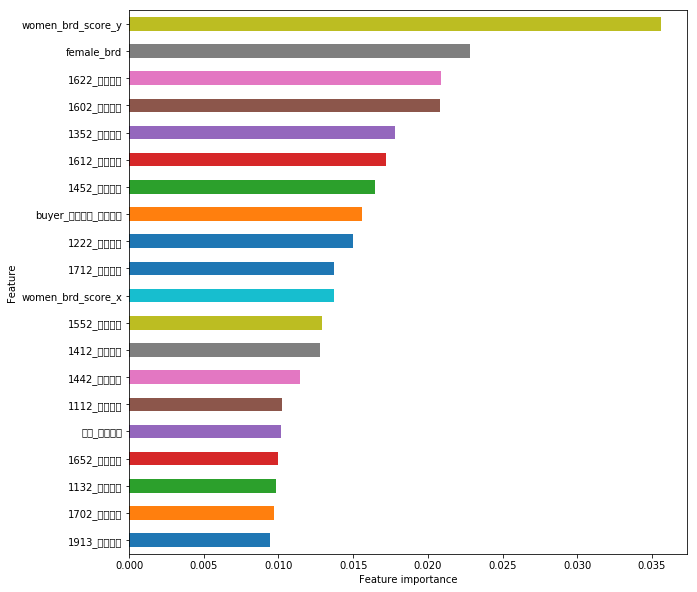

In [13]:
feature_importance = xgb.feature_importances_
Series_feat_imp = Series(feature_importance, index=X_train.columns).sort_values(ascending=False)[0:20]
plt.figure(figsize=(10, 10))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [10]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

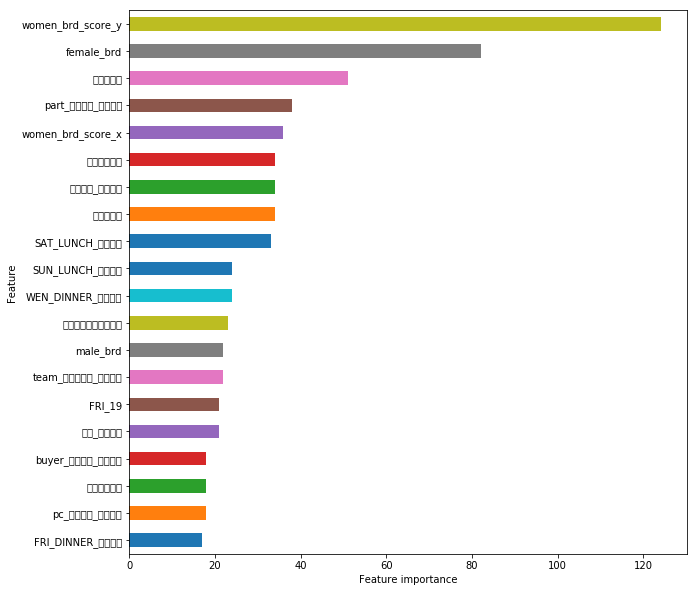

In [11]:
import seaborn as sns
from pandas import Series

feature_importance = lgbm.feature_importances_
Series_feat_imp = Series(feature_importance, index=X_train.columns).sort_values(ascending=False)[0:20]
plt.figure(figsize=(10, 10))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.1,
                           loss='deviance', max_depth=8, max_features='sqrt',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None,
                           min_samples_leaf=0.3545454545454546,
                           min_samples_split=0.17272727272727273,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [51]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('xgb', clf),('lgbm',lgbm)], voting='soft')

In [52]:
pred_e = votingC.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [53]:
votingC1 = VotingClassifier(estimators=[('xgb', clf),('lgbm',lgbm),('gbc',gbc)], voting='soft')

In [54]:
pred_q = votingC1.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [55]:
pred_e = pd.concat([IDtest, pd.Series(pred_e, name="gender")] ,axis=1)
pred_e.to_csv('pred_e.csv', index=False)

In [56]:
pred_q = pd.concat([IDtest, pd.Series(pred_q, name="gender")] ,axis=1)
pred_q.to_csv('pred_q.csv', index=False)

### Feature6

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns', 10, 'max_rows', 20)

In [12]:
tr_train = pd.read_csv('X_train.csv', encoding='cp949')
tr_test = pd.read_csv('X_test.csv', encoding='cp949')
yy_train = pd.read_csv('y_train.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv').gender
#tr_train = pd.read_csv('../input/X_train.csv', encoding='cp949')
#tr_test = pd.read_csv('../input/X_test.csv', encoding='cp949')
#yy_train = pd.read_csv('../input/y_train.csv', encoding='cp949')
tr = pd.concat([tr_train, tr_test])
tr

,custid,sales_date,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee
0,0,2000-06-25 00:00:00,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,90000,9000,81000,3,0
1,0,2000-06-25 00:00:00,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,39000,3900,35100,1,0
2,0,2000-08-26 00:00:00,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,175000,17500,157500,3,0
3,0,2000-08-26 00:00:00,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,수입명품,1,455000,45500,409500,3,0
4,0,2000-09-03 00:00:00,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,0,100000,10000,90000,3,0
5,0,2000-09-03 00:00:00,1842,무역점,4300381019900,CP컴퍼니,캐릭터캐주얼,캐릭터정장,남성의류,의류패션팀,캐릭터캐주얼,0,113000,11300,101700,3,0
6,0,2000-09-03 00:00:00,1930,무역점,6315960019900,폴로,트래디셔널,트래디셔널,골프/유니캐쥬얼,의류패션팀,트래디셔널캐주얼,0,118000,11800,106200,3,0
7,0,2000-12-13 00:00:00,1920,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,96000,9600,86400,3,0
8,0,2000-12-22 00:00:00,1910,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,166000,16600,149400,3,0
9,0,2000-12-29 00:00:00,1900,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,96000,9600,86400,3,0


In [13]:
features = []

In [14]:
newfeat = tr_train.merge(yy_train, how='left')
newfeat.head()

,custid,sales_date,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee,gender
0,0,2000-06-25 00:00:00,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,90000,9000,81000,3,0,1
1,0,2000-06-25 00:00:00,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,39000,3900,35100,1,0,1
2,0,2000-08-26 00:00:00,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,175000,17500,157500,3,0,1
3,0,2000-08-26 00:00:00,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,수입명품,1,455000,45500,409500,3,0,1
4,0,2000-09-03 00:00:00,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,0,100000,10000,90000,3,0,1


In [15]:
f = newfeat[['custid','str_nm','gender']].set_index('custid')
f= f.groupby('str_nm').agg('mean')
f = f.to_dict()['gender']
tr['str_nm_target'] = tr.str_nm.apply(lambda x: f.get(x,0))
f = tr.groupby('custid')['str_nm_target'].agg({'str_nm_tar_mean':'mean'}).reset_index()
features.append(f); f

,custid,str_nm_tar_mean
0,0,0.407796
1,1,0.434277
2,2,0.354744
3,3,0.343820
4,4,0.359759
5,5,0.416312
6,6,0.422108
7,7,0.320267
8,8,0.359759
9,9,0.359759


In [16]:
f = newfeat[['custid','pc_nm','gender']].set_index('custid')
f= f.groupby('pc_nm').agg('mean')
f = f.to_dict()['gender']
tr['pc_nm_target'] = tr.pc_nm.apply(lambda x: f.get(x,0))
f = tr.groupby('custid')['pc_nm_target'].agg({'pc_nm_tar_mean':'mean'}).reset_index()
features.append(f); f

,custid,pc_nm_tar_mean
0,0,0.346715
1,1,0.397255
2,2,0.381063
3,3,0.353148
4,4,0.316751
5,5,0.405717
6,6,0.408119
7,7,0.370067
8,8,0.322608
9,9,0.359332


In [17]:
f = newfeat[['custid','part_nm','gender']].set_index('custid')
f= f.groupby('part_nm').agg('mean')
f = f.to_dict()['gender']
tr['part_nm_target'] = tr.part_nm.apply(lambda x: f.get(x,0))
f = tr.groupby('custid')['part_nm_target'].agg({'part_nm_tar_mean':'mean'}).reset_index()
features.append(f); f

,custid,part_nm_tar_mean
0,0,0.371805
1,1,0.418640
2,2,0.362159
3,3,0.343724
4,4,0.308007
5,5,0.433109
6,6,0.430684
7,7,0.346207
8,8,0.321220
9,9,0.362380


In [18]:
f = newfeat[['custid','buyer_nm','gender']].set_index('custid')
f= f.groupby('buyer_nm').agg('mean')
f = f.to_dict()['gender']
tr['buyer_nm_target'] = tr.buyer_nm.apply(lambda x: f.get(x,0))
f = tr.groupby('custid')['buyer_nm_target'].agg({'buyer_nm_tar_mean':'mean'}).reset_index()
features.append(f); f

,custid,buyer_nm_tar_mean
0,0,0.332128
1,1,0.354972
2,2,0.379483
3,3,0.369975
4,4,0.324812
5,5,0.383968
6,6,0.374533
7,7,0.380190
8,8,0.318013
9,9,0.357571


In [19]:
f = tr.groupby('custid')['tot_amt'].agg([('총구매액', 'sum')]).reset_index()
features.append(f)

In [20]:
f = tr.groupby('custid')['tot_amt'].agg([('구매건수', 'size')]).reset_index()
features.append(f)

In [21]:
f = tr.groupby('custid')['tot_amt'].agg([('평균구매가격', 'mean')]).reset_index()
features.append(f)

In [22]:
f = tr.groupby('custid')['inst_mon'].agg([('평균할부개월수', 'mean')]).reset_index()
f.iloc[:,1] = f.iloc[:,1].apply(round, args=(1,))
features.append(f)

In [23]:
tr['sdate'] = tr.sales_date.str[:10]
f = tr.groupby(by = 'custid')['sdate'].agg([('내점일수','nunique')]).reset_index()
features.append(f)

In [24]:
x = tr[tr['import_flg'] == 1].groupby('custid').size() / tr.groupby('custid').size()
f = x.reset_index().rename(columns={0: '수입상품_구매비율'}).fillna(0)
f.iloc[:,1] = (f.iloc[:,1]*100).apply(round, args=(1,))
features.append(f)

In [25]:
def f2(x):
    k = x.dayofweek
    if k <= 2 :
        return('월화수_구매건수')
    elif 3 <= k < 5 :
        return('목금_구매건수')
    elif 5 <= k < 6 :
        return('토_구매건수')
    else :
        return('일_구매건수')    
    
tr['요일2'] = pd.to_datetime(tr.sales_date).apply(f2)
f = pd.pivot_table(tr, index='custid', columns='요일2', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
features.append(f)

In [26]:
def f1(x):
    k = x.month
    if 2 <= k <= 4 :
        return('234월_구매건수')
    elif 5 <= k <= 7 :
        return('567월_구매건수')
    elif 8 <= k <= 10 :
        return('8910월_구매건수')
    else :
        return('11121월_구매건수')    
    
tr['season2'] = pd.to_datetime(tr.sales_date).apply(f1)
f = pd.pivot_table(tr, index='custid', columns='season2', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
features.append(f)

In [27]:
def f2(x):
    if 901 <= x < 1200 :
        return('12시 이전_구매건수')
    elif 1200 <= x < 1400 :
        return('12~2시_구매건수')
    elif 1400 <= x < 1600 :
        return('2~4시_구매건수')
    elif 1600 <= x < 1800 :
        return('4~6시_구매건수')
    else :
        return('6시이후_구매건수')  

tr['timeslot2'] = tr.sales_time.apply(f2)

In [28]:
f = pd.pivot_table(tr, index='custid', columns='timeslot2', values='tot_amt',
                   aggfunc=np.size, fill_value=0).reset_index()
features.append(f); f

timeslot2,custid,12~2시_구매건수,12시 이전_구매건수,2~4시_구매건수,4~6시_구매건수,6시이후_구매건수
0,0,2,0,0,0,9
1,1,3,4,5,9,5
2,2,1,3,1,2,4
3,3,5,3,3,6,13
4,4,0,0,4,0,0
5,5,3,8,1,8,12
6,6,8,0,5,10,8
7,7,3,0,9,17,6
8,8,1,0,9,5,3
9,9,21,2,6,6,24


In [29]:
f = tr.groupby('custid')['dis_amt'].agg([('평균할인금액', 'mean')]).reset_index()
f.iloc[:,1] = f.iloc[:,1].apply(round, args=(1,))
features.append(f)

In [30]:
f = tr.groupby('custid')['sales_time'].agg([('평균구매시간', 'mean')]).reset_index()
f.iloc[:,1] = f.iloc[:,1].apply(round, args=(1,))
features.append(f)

In [31]:
f = tr.groupby('custid')['net_amt'].agg([('실제구매금액', 'sum')]).reset_index()
f.iloc[:,1] = f.iloc[:,1].apply(round, args=(1,))
features.append(f)

In [32]:
f = tr.groupby('custid')['net_amt'].agg([('실제구매금액평균', 'mean')]).reset_index()
f.iloc[:,1] = f.iloc[:,1].apply(round, args=(1,))
features.append(f)

In [33]:
f = pd.pivot_table(tr, index='custid', columns='str_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
features.append(f)

In [34]:
tr.loc[456697,"sales_time"] = 1530
tr["time"] = tr['sdate'].astype(str).str.cat(tr["sales_time"].astype(str), sep =" ") 
tr["time"] = pd.to_datetime(tr.time, format='%Y-%m-%d %H%M')

In [35]:
f = tr.groupby(['sdate','custid'])['time'].agg([('time', ['min','max'])]).reset_index()
f['shopping_time'] = (f['time']['max'] - f['time']['min']).dt.total_seconds()
f.drop(['sdate','time'], axis=1, inplace=True,level=0)
f = f.groupby(['custid'])['shopping_time'].agg([('shopping_time_mean','mean')]).reset_index()
features.append(f)

In [36]:
f = pd.pivot_table(tr, index='custid', columns='part_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
features.append(f)

In [37]:
f = pd.pivot_table(tr, index='custid', columns='buyer_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
features.append(f)

In [38]:
X_train = pd.DataFrame({'custid': tr_train.custid.unique()})
for f in features :
    X_train = pd.merge(X_train, f, how='left')
display(X_train)

X_test = pd.DataFrame({'custid': tr_test.custid.unique()})
for f in features :
    X_test = pd.merge(X_test, f, how='left')
display(X_test)

,custid,str_nm_tar_mean,pc_nm_tar_mean,part_nm_tar_mean,buyer_nm_tar_mean,총구매액,구매건수,평균구매가격,평균할부개월수,내점일수,수입상품_구매비율,목금_구매건수,월화수_구매건수,일_구매건수,토_구매건수,...,조리욕실,청과곡물,침구수예,캐릭터캐주얼,타운모피,트래디셔널캐주얼,피혁A,피혁B,행사장(남성),행사장(아동스포츠),행사장(여성정장),행사장(여성캐주얼),행사장(여성캐쥬),행사장(잡화),화장품
0,0,0.407796,0.346715,0.371805,0.332128,1742000,11,158363.636364,2.8,7,63.6,2,2,5,2,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,8
1,1,0.434277,0.397255,0.418640,0.354972,2772100,26,106619.230769,2.5,16,42.3,8,5,4,9,...,1,0,0,2,0,0,0,0,0,0,0,0,0,0,3
2,2,0.354744,0.381063,0.362159,0.379483,3750850,11,340986.363636,3.5,7,9.1,2,5,4,0,...,0,0,1,1,0,3,1,0,0,0,0,0,0,0,1
3,3,0.343820,0.353148,0.343724,0.369975,2300500,30,76683.333333,2.7,13,0.0,13,6,6,5,...,1,0,0,2,0,1,1,0,0,0,0,0,0,0,1
4,4,0.359759,0.316751,0.308007,0.324812,1045000,4,261250.000000,4.5,2,25.0,3,0,1,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
5,5,0.416312,0.405717,0.433109,0.383968,5053759,32,157929.968750,1.9,21,18.8,23,4,3,2,...,0,0,0,2,0,4,0,0,0,0,0,0,0,0,4
6,6,0.422108,0.408119,0.430684,0.374533,3785029,31,122097.709677,1.8,11,9.7,6,10,2,13,...,1,0,0,3,0,0,0,0,0,0,0,0,0,0,1
7,7,0.320267,0.370067,0.346207,0.380190,1223182,35,34948.057143,1.4,23,8.6,7,18,4,6,...,1,0,0,1,0,1,1,0,0,0,0,0,0,0,2
8,8,0.359759,0.322608,0.321220,0.318013,1267500,18,70416.666667,2.1,10,11.1,1,3,10,4,...,0,0,0,0,0,1,1,1,0,0,0,0,0,0,4
9,9,0.359759,0.359332,0.362380,0.357571,4956620,59,84010.508475,1.0,34,10.2,20,19,9,11,...,1,0,0,4,0,6,4,0,0,0,0,0,0,0,11


,custid,str_nm_tar_mean,pc_nm_tar_mean,part_nm_tar_mean,buyer_nm_tar_mean,총구매액,구매건수,평균구매가격,평균할부개월수,내점일수,수입상품_구매비율,목금_구매건수,월화수_구매건수,일_구매건수,토_구매건수,...,조리욕실,청과곡물,침구수예,캐릭터캐주얼,타운모피,트래디셔널캐주얼,피혁A,피혁B,행사장(남성),행사장(아동스포츠),행사장(여성정장),행사장(여성캐주얼),행사장(여성캐쥬),행사장(잡화),화장품
0,30000,0.434779,0.393810,0.447600,0.377699,2078240,27,76971.851852,1.2,15,7.4,5,7,10,5,...,0,0,0,1,0,2,1,0,0,0,0,0,0,0,1
1,30001,0.438040,0.417275,0.455681,0.361880,4158320,27,154011.851852,1.7,10,7.4,0,7,15,5,...,0,0,0,5,0,0,5,2,0,0,0,0,0,0,1
2,30002,0.394105,0.368026,0.389068,0.347998,8007256,100,80072.560000,2.1,29,25.0,29,41,4,26,...,5,0,0,6,2,2,4,0,0,0,0,0,0,0,23
3,30003,0.288378,0.301018,0.273294,0.348032,1367820,43,31809.767442,1.4,25,11.6,23,12,0,8,...,0,0,0,6,0,0,2,0,0,0,0,0,0,0,7
4,30004,0.446224,0.425770,0.457068,0.391779,2890471,55,52554.018182,1.3,32,7.3,28,13,10,4,...,6,0,2,0,0,0,0,0,0,0,0,0,0,0,1
5,30005,0.288378,0.316830,0.251494,0.313818,57000,1,57000.000000,3.0,1,100.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,30006,0.288378,0.348248,0.325711,0.378238,589750,7,84250.000000,1.3,5,0.0,2,4,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7,30007,0.324069,0.283112,0.274585,0.309560,295500,6,49250.000000,1.3,4,16.7,2,0,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
8,30008,0.447826,0.380119,0.434162,0.346230,400220,9,44468.888889,1.4,7,11.1,4,0,2,3,...,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1
9,30009,0.421211,0.322685,0.371554,0.317683,239000,4,59750.000000,3.0,2,0.0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [39]:
X_train["평균할인율"] = (X_train["평균할인금액"] / X_train["평균구매가격"])*100
X_test["평균할인율"] = (X_test["평균할인금액"] / X_test["평균구매가격"])*100

In [40]:
X_train["토_비율"] = (X_train["토_구매건수"] / X_train["구매건수"])*100
X_train["일_비율"] = (X_train["일_구매건수"] / X_train["구매건수"])*100
X_test["토_비율"] = (X_test["토_구매건수"] / X_test["구매건수"])*100
X_test["일_비율"] = (X_test["일_구매건수"] / X_test["구매건수"])*100

In [41]:
X_train['가정용품R']=X_train['가정용품']+X_train['가정용품파트']
X_train['공산품R']=X_train['공산품']+X_train['공산품파트']
X_train['로얄부띠끄R']=X_train['로얄부띠끄']+X_train['로얄부틱']
X_train['생식품R']=X_train['생식품']+X_train['생식품파트']
X_train['스포츠캐주얼R']=X_train['스포츠캐주얼']+X_train['스포츠캐쥬얼']
X_train['여성캐주얼R']=X_train['여성캐주얼']+X_train['여성캐쥬얼']
X_train['잡화R']=X_train['잡화']+X_train['잡화파트']

X_test['가정용품R']=X_test['가정용품']+X_test['가정용품파트']
X_test['공산품R']=X_test['공산품']+X_test['공산품파트']
X_test['로얄부띠끄R']=X_test['로얄부띠끄']+X_test['로얄부틱']
X_test['생식품R']=X_test['생식품']+X_test['생식품파트']
X_test['스포츠캐주얼R']=X_test['스포츠캐주얼']+X_test['스포츠캐쥬얼']
X_test['여성캐주얼R']=X_test['여성캐주얼']+X_test['여성캐쥬얼']
X_test['잡화R']=X_test['잡화']+X_test['잡화파트']

In [42]:
X_train.drop(['가정용품','가정용품파트','공산품','공산품파트','로얄부띠끄','로얄부틱','생식품','생식품파트','스포츠캐주얼','스포츠캐쥬얼','여성캐주얼','여성캐쥬얼','잡화','잡화파트'], axis=1, inplace=True)
X_test.drop(['가정용품','가정용품파트','공산품','공산품파트','로얄부띠끄','로얄부틱','생식품','생식품파트','스포츠캐주얼','스포츠캐쥬얼','여성캐주얼','여성캐쥬얼','잡화','잡화파트'], axis=1, inplace=True)

In [43]:
X_train['남성파트']=X_train['가정용품R']+X_train['공산품R']+X_train['생식품R']+X_train['케주얼,구두,아동']
X_test['남성파트']=X_test['가정용품R']+X_test['공산품R']+X_test['생식품R']+X_test['케주얼,구두,아동']
X_train['여성파트']=X_train['여성캐주얼R']+X_train['영캐릭터']+X_train['영플라자']+X_train['패션잡화'] 
X_test['여성파트']=X_test['여성캐주얼R']+X_test['영캐릭터']+X_test['영플라자']+X_test['패션잡화'] 

#def f1(x):
#    if  x <= 2000000 :
#        return('1')
#    elif 2000001 <= x < 5000000 :
#        return('2')
#    else :
#        return('3')  
#
#X_train['총구매액B'] = X_train.총구매액.apply(f1)
#X_train['총구매액B'] = X_train['총구매액B'].astype(int)
#X_test['총구매액B'] = X_test.총구매액.apply(f1)
#X_test['총구매액B'] = X_test['총구매액B'].astype(int)

#def f1(x):
#    if  x <= 2000000 :
#        return('1')
#    elif 2000001 <= x < 5000000 :
#        return('2')
#    else :
#        return('3')  
#
#X_test['총구매액B'] = X_test.총구매액.apply(f1)
#X_test['총구매액B'] = X_test['총구매액B'].astype(int)

#def f1(x):
#    if  x <= 1500 :
#        return('4')
#    elif 1501 <= x < 1600 :
#        return('3')
#    elif 1601 <= x < 1700 :
#        return('2')
#    else :
#        return('1')  
#
#X_train['평균구매시간B'] = X_train.평균구매시간.apply(f1)
#X_train['평균구매시간B'] = X_train['평균구매시간B'].astype(int)
#X_test['평균구매시간B'] = X_test.평균구매시간.apply(f1)
#X_test['평균구매시간B'] = X_test['평균구매시간B'].astype(int)

#def f1(x):
#    if  x <= 2 :
#        return('1')
#    elif 2.0001 <= x < 3 :
#        return('2')
#    elif 3.0001 <= x < 4 :
#        return('3')
#    elif 4.0001 <= x < 5 :
#        return('4')
#    else :
#        return('5')  
#
#X_train['평균할인율B'] = X_train.평균할인율.apply(f1)
#X_train['평균할인율B'] = X_train['평균할인율B'].astype(int)
#X_test['평균할인율B'] = X_test.평균할인율.apply(f1)
#X_test['평균할인율B'] = X_test['평균할인율B'].astype(int)

#def f1(x):
#    if  x < 1 :
#        return('1')
#    elif 1 <= x <= 10 :
#        return('2')
#    elif 11 <= x <= 20 :
#        return('3')
#    else :
#        return('4')  
#
#X_train['남성파트B'] = X_train.남성파트.apply(f1)
#X_train['남성파트B'] = X_train['남성파트B'].astype(int)
#X_test['남성파트B'] = X_test.남성파트.apply(f1)
#X_test['남성파트B'] = X_test['남성파트B'].astype(int)

#def f1(x):
#    if  x < 1 :
#        return('3')
#    elif 1 <= x <= 4 :
#        return('2')
#    else :
#        return('1')  
#
#X_train['여성파트B'] = X_train.여성파트.apply(f1)
#X_train['여성파트B'] = X_train['여성파트B'].astype(int)
#X_test['여성파트B'] = X_test.여성파트.apply(f1)
#X_test['여성파트B'] = X_test['여성파트B'].astype(int)

#X_train['구매_시간'] = X_train['총구매액B'] * X_train['평균구매시간B']
#X_train['구매_할인'] = X_train['총구매액B'] * X_train['평균할인율B']
#X_train['할인_시간'] = X_train['평균구매시간B'] * X_train['평균할인율B']
#X_train['구매_할인_시간'] = X_train['평균구매시간B'] * X_train['평균할인율B']* X_train['총구매액B']
#X_train['남성_여성'] = X_train['남성파트B'] * X_train['여성파트B']
#X_train['구매_남성'] = X_train['총구매액B'] * X_train['남성파트B']
#X_train['구매_여성'] = X_train['총구매액B'] * X_train['여성파트B']
#X_train['할인_남성'] = X_train['평균할인율B'] * X_train['남성파트B']
#X_train['할인_여성'] = X_train['평균할인율B'] * X_train['여성파트B']
#X_train['시간_남성'] = X_train['평균구매시간B'] * X_train['남성파트B']
#X_train['시간_여성'] = X_train['평균구매시간B'] * X_train['여성파트B']

#X_test['구매_시간'] = X_test['총구매액B'] * X_test['평균구매시간B']
#X_test['구매_할인'] = X_test['총구매액B'] * X_test['평균할인율B']
#X_test['할인_시간'] = X_test['평균구매시간B'] * X_test['평균할인율B']
#X_test['구매_할인_시간'] = X_test['평균구매시간B'] * X_test['평균할인율B']* X_test['총구매액B']
#X_test['남성_여성'] = X_test['남성파트B'] * X_test['여성파트B']
#X_test['구매_남성'] = X_test['총구매액B'] * X_test['남성파트B']
#X_test['구매_여성'] = X_test['총구매액B'] * X_test['여성파트B']
#X_test['할인_남성'] = X_test['평균할인율B'] * X_test['남성파트B']
#X_test['할인_여성'] = X_test['평균할인율B'] * X_test['여성파트B']
#X_test['시간_남성'] = X_test['평균구매시간B'] * X_test['남성파트B']
#X_test['시간_여성'] = X_test['평균구매시간B'] * X_test['여성파트B']

In [44]:
f = X_train.총구매액.where(X_train.총구매액>=0, other=0)
f = np.log(f+1)
X_train.총구매액 = f

f = X_test.총구매액.where(X_test.총구매액>=0, other=0)
f = np.log(f+1)
X_test.총구매액 = f

f = X_train.평균구매가격.where(X_train.평균구매가격>=0, other=0)
f = np.log(f+1)
X_train.평균구매가격 = f

f = X_test.평균구매가격.where(X_test.평균구매가격>=0, other=0)
f = np.log(f+1)
X_test.평균구매가격 = f

f = X_train.구매건수.where(X_train.구매건수>=0, other=0)
f = np.log(f+1)
X_train.구매건수 = f

f = X_test.구매건수.where(X_test.구매건수>=0, other=0)
f = np.log(f+1)
X_test.구매건수 = f

f = X_train.내점일수.where(X_train.내점일수>=0, other=0)
f = np.log(f+1)
X_train.내점일수 = f

f = X_test.내점일수.where(X_test.내점일수>=0, other=0)
f = np.log(f+1)
X_test.내점일수 = f


f = X_train.실제구매금액평균.where(X_train.실제구매금액평균>=0, other=0)
f = np.log(f+1)
X_train.실제구매금액평균 = f

f = X_test.실제구매금액평균.where(X_test.실제구매금액평균>=0, other=0)
f = np.log(f+1)
X_test.실제구매금액평균 = f

f = X_train.실제구매금액.where(X_train.실제구매금액>=0, other=0)
f = np.log(f+1)
X_train.실제구매금액 = f

f = X_test.실제구매금액.where(X_test.실제구매금액>=0, other=0)
f = np.log(f+1)
X_test.실제구매금액 = f

In [45]:
X_train.to_csv('feature6_train.csv', index=False)
X_test.to_csv('feature6_test.csv', index=False)

### Feature6

In [102]:
X_train6 = pd.read_csv('feature6_train.csv', encoding = 'UTF-8')
X_test6 = pd.read_csv('feature6_test.csv', encoding = 'UTF-8')

In [103]:
X_train6.shape

(30000, 87)

X6 = pd.concat([X_train6, X_test6])

In [104]:
y_train = pd.read_csv('y_train.csv',encoding='cp949').gender

IDtest = X6.custid;
X6.drop(['custid'], axis=1, inplace=True)

In [149]:
clf.fit(X_train6, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

In [105]:
IDtest = X_test6.custid;
X_train6.drop(['custid'], axis=1, inplace=True)
X_test6.drop(['custid'], axis=1, inplace=True)

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.1,
              loss='deviance', max_depth=8, max_features='sqrt',
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=0.3545454545454546,
              min_samples_split=0.17272727272727273,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.85, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [148]:
from xgboost import XGBClassifier
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.8, gamma=5, learning_rate=0.1, 
                         max_delta_step=0,  max_depth=5, min_child_weight=5, missing=None, n_estimators=100, n_jobs=1, nthread=None,
                         objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                         silent=True, subsample=0.6)

In [67]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.06528650438687811,
        max_depth=24, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=36, n_jobs=-1, num_leaves=31,
        objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=0.1817270377811787,
        subsample_for_bin=200000, subsample_freq=0)

In [68]:
votingC = VotingClassifier(estimators=[('gbc', gbc),('clf', clf),('lgbm', lgbm)], voting='soft')

In [70]:
pred_f = votingC.fit(X_train6, y_train).predict_proba(X_test6)[:,1]

In [71]:
pred_f = pd.concat([IDtest, pd.Series(pred_f, name="gender")] ,axis=1)
pred_f.to_csv('pred_f.csv', index=False)

In [150]:
X6.shape

(49995, 96)

In [151]:
len(list(X_train6.columns))

96

In [152]:
list(clf.feature_importances_)

[0.0120884795,
 0.04634021,
 0.020437947,
 0.030464852,
 0.010082417,
 0.0098471595,
 0.012645125,
 0.009750327,
 0.010821908,
 0.010153415,
 0.008880349,
 0.008894368,
 0.010530091,
 0.0105027305,
 0.008731469,
 0.010326341,
 0.0106207095,
 0.00911997,
 0.010848703,
 0.018817734,
 0.010282154,
 0.010081495,
 0.014723243,
 0.0126524,
 0.016426973,
 0.0096992245,
 0.011218701,
 0.011876736,
 0.009324643,
 0.010423527,
 0.009565921,
 0.010001605,
 0.013368756,
 0.015351392,
 0.013763692,
 0.0114772525,
 0.0,
 0.011335754,
 0.010036161,
 0.0085795745,
 0.009442188,
 0.010815865,
 0.016251158,
 0.0087014865,
 0.00975542,
 0.009718051,
 0.0,
 0.008903491,
 0.008678284,
 0.011799246,
 0.0096811075,
 0.009459912,
 0.008344366,
 0.008588009,
 0.00972769,
 0.011454857,
 0.008390441,
 0.009802075,
 0.00957181,
 0.011588887,
 0.008513514,
 0.012703098,
 0.009668558,
 0.009450137,
 0.01022891,
 0.009432295,
 0.0,
 0.022943875,
 0.0,
 0.009417702,
 0.0,
 0.011261167,
 0.008840823,
 0.0071673887,
 0

In [153]:
imp_6 = pd.DataFrame(list(clf.feature_importances_),index = list(X_train6.columns))

In [154]:
imp_6.head()

,0
str_nm_tar_mean,0.012088
pc_nm_tar_mean,0.046340
part_nm_tar_mean,0.020438
buyer_nm_tar_mean,0.030465
총구매액,0.010082


In [155]:
for i in range(len(X6.columns)) :
    if imp_6.iloc[i,0] == 0 :
        X6.drop(imp_6.iloc[i,:].name, axis=1, inplace=True)
    else :
        pass

In [156]:
X6.shape

(49995, 86)

In [157]:
X_train6.head()

,str_nm_tar_mean,pc_nm_tar_mean,part_nm_tar_mean,buyer_nm_tar_mean,총구매액,구매건수,평균구매가격,평균할부개월수,내점일수,수입상품_구매비율,목금_구매건수,월화수_구매건수,일_구매건수,토_구매건수,11121월_구매건수,...,행사장(여성캐쥬),행사장(잡화),화장품,평균할인율,토_비율,일_비율,가정용품R,공산품R,로얄부띠끄R,생식품R,스포츠캐주얼R,여성캐주얼R,잡화R,남성파트,여성파트
0,0.407796,0.346715,0.371805,0.332128,14.370545,2.484907,11.972655,2.8,2.079442,63.6,2,2,5,2,3,...,0,0,8,10.000023,18.181818,45.454545,0,0,0,0,0,0,6,0,0
1,0.434277,0.397255,0.418640,0.354972,14.835116,3.295837,11.577029,2.5,2.833213,42.3,8,5,4,9,5,...,0,0,3,2.042877,34.615385,15.384615,2,0,6,0,0,3,5,10,3
2,0.354744,0.381063,0.362159,0.379483,15.137493,2.484907,12.739601,3.5,2.079442,9.1,2,5,4,0,4,...,0,0,1,6.800858,0.000000,36.363636,4,0,0,0,0,0,1,4,0
3,0.343820,0.353148,0.343724,0.369975,14.648637,3.433987,11.247453,2.7,2.639057,0.0,13,6,6,5,6,...,0,0,1,3.984308,16.666667,20.000000,2,3,0,0,9,0,0,5,0
4,0.359759,0.316751,0.308007,0.324812,13.859528,1.609438,12.473237,4.5,1.098612,25.0,3,0,1,0,0,...,0,0,1,2.086124,0.000000,25.000000,0,0,0,0,0,2,0,0,2


In [158]:
X6 = pd.concat([IDtest, X6], axis=1)

In [159]:
X6.head()

,custid,str_nm_tar_mean,pc_nm_tar_mean,part_nm_tar_mean,buyer_nm_tar_mean,총구매액,구매건수,평균구매가격,평균할부개월수,내점일수,수입상품_구매비율,목금_구매건수,월화수_구매건수,일_구매건수,토_구매건수,...,피혁B,행사장(여성캐쥬),화장품,평균할인율,토_비율,일_비율,가정용품R,공산품R,로얄부띠끄R,생식품R,스포츠캐주얼R,여성캐주얼R,잡화R,남성파트,여성파트
0,0,0.407796,0.346715,0.371805,0.332128,14.370545,2.484907,11.972655,2.8,2.079442,63.6,2,2,5,2,...,0,0,8,10.000023,18.181818,45.454545,0,0,0,0,0,0,6,0,0
1,1,0.434277,0.397255,0.418640,0.354972,14.835116,3.295837,11.577029,2.5,2.833213,42.3,8,5,4,9,...,0,0,3,2.042877,34.615385,15.384615,2,0,6,0,0,3,5,10,3
2,2,0.354744,0.381063,0.362159,0.379483,15.137493,2.484907,12.739601,3.5,2.079442,9.1,2,5,4,0,...,0,0,1,6.800858,0.000000,36.363636,4,0,0,0,0,0,1,4,0
3,3,0.343820,0.353148,0.343724,0.369975,14.648637,3.433987,11.247453,2.7,2.639057,0.0,13,6,6,5,...,0,0,1,3.984308,16.666667,20.000000,2,3,0,0,9,0,0,5,0
4,4,0.359759,0.316751,0.308007,0.324812,13.859528,1.609438,12.473237,4.5,1.098612,25.0,3,0,1,0,...,0,0,1,2.086124,0.000000,25.000000,0,0,0,0,0,2,0,0,2


In [162]:
X_train6 = X6.iloc[0:30000,]
X_train6.shape

(30000, 87)

In [164]:
X_test6 = X6.iloc[30000:,]
X_test6.shape

(19995, 87)

In [169]:
X_train6.to_csv('feature6_train.csv', index=False)
X_test6.to_csv('feature6_test.csv', index=False)

In [119]:
#만약 변수중요도로 만든 데이터프레임이 df1 / 기존의 데이터프레임은 df2
#for i in range(len(list(a.columns))):
#    if imp_6.iloc[i,0] == 0 :
#        a.drop(list(a.columns)[i],axis=1)#list(data_team2.columns)[i]->컬럼명임
#    else:
#        pass

##### Feature3

In [170]:
X_train3 = pd.read_csv('feature3_train_1.csv', encoding = 'UTF-8')
X_test3 = pd.read_csv('feature3_test_1.csv', encoding = 'UTF-8')

In [171]:
X_train3.shape

(30000, 2692)

In [173]:
X3 = pd.concat([X_train3, X_test3])
X3.shape

(49995, 2692)

In [174]:
y_train = pd.read_csv('y_train.csv',encoding='cp949').gender

In [175]:
IDtest = X3.custid;
X3.drop(['custid'], axis=1, inplace=True)

In [176]:
#IDtest = X_test.custid;
X_train3.drop(['custid'], axis=1, inplace=True)
X_test3.drop(['custid'], axis=1, inplace=True)

In [177]:
from xgboost import XGBClassifier
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.8, gamma=5, learning_rate=0.1, 
                         max_delta_step=0,  max_depth=5, min_child_weight=5, missing=None, n_estimators=100, n_jobs=1, nthread=None,
                         objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                         silent=True, subsample=0.6)

In [178]:
clf.fit(X_train3, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

In [179]:
X3.shape

(49995, 2691)

In [180]:
len(list(X_train3.columns))

2691

In [181]:
list(clf.feature_importances_)

[0.004518558,
 0.0044003273,
 0.010838068,
 0.0017593588,
 0.016473526,
 0.0014139308,
 0.0015942134,
 0.0021578777,
 0.0017480304,
 0.002050736,
 0.0016168482,
 0.002246326,
 0.0033307655,
 0.00149276,
 0.0016208179,
 0.0,
 0.004417367,
 0.0018860933,
 0.0,
 0.0021219035,
 0.0014011516,
 0.0011845663,
 0.0017736274,
 0.0024785863,
 0.001968541,
 0.001866653,
 0.0043839402,
 0.0029121693,
 0.0037322678,
 0.0015898885,
 0.002449473,
 0.0016225209,
 0.0,
 0.002128043,
 0.0060641477,
 0.0019214592,
 0.0015886376,
 0.0017724965,
 0.001735432,
 0.0026493832,
 0.002014678,
 0.0020062944,
 0.00208637,
 0.0,
 0.0014294732,
 0.0023830603,
 0.005010167,
 0.0024242548,
 0.0,
 0.0015835536,
 0.001261643,
 0.0023015197,
 0.0045150784,
 0.0,
 0.0,
 0.0,
 0.0015659941,
 0.002106535,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0021542471,
 0.002403642,
 0.0,
 0.0020442642,
 0.001886958,
 0.0022625672,
 0.0,
 0.0014802368,
 0.0019841767,
 0.0015868201,
 0.0019470224,
 0.0020619086,
 0.001461286,
 0.0,

In [182]:
imp_3 = pd.DataFrame(list(clf.feature_importances_),index = list(X_train3.columns))

In [183]:
imp_3.head()

,0
dis_rate,0.004519
sales_time,0.004400
남성,0.010838
비남성,0.001759
남성part,0.016474


In [184]:
for i in range(len(X3.columns)) :
    if imp_3.iloc[i,0] == 0 :
        X3.drop(imp_3.iloc[i,:].name, axis=1, inplace=True)
    else :
        pass

In [185]:
X3.shape

(49995, 457)

In [186]:
X_train3.head()

,dis_rate,sales_time,남성,비남성,남성part,비화장품,화장품_x,화장품비율,shopping_time_mean,real_amt,good_count_mean,무역점,본점,신촌점,천호점,...,주구매코너_헤어액세사리,주구매코너_홈데코,주구매코너_화장잡화,주구매코너_화장품,주구매코너_훼미닌부틱,평균내점구매액,주중방문비율,국내상품_구매비율,할부구매가격,주말방문수,주중방문수,내점당편균구매건수,주중구매액,주말구매액,평균할인율
0,10.000000,1757.090909,113000,118000,48.917749,455000,1056000,69.887492,1182.857143,55151.515152,1.571429,460000,1282000,0,0,...,0,0,0,0,0,248857.142857,57.1,36.4,56558.441558,3,4,1.571429,994682.0,747318.0,10.000023
1,1.923211,1531.153846,188000,350000,34.944238,350000,40000,10.256410,1275.000000,39514.102564,1.181818,542000,2230100,0,0,...,0,0,0,0,0,173256.250000,50.0,57.7,42647.692308,8,8,1.625000,1386050.0,1386050.0,2.042877
2,7.272942,1537.090909,445000,2312000,16.140733,1200000,146000,10.846954,428.571429,187146.969697,1.571429,3161500,0,0,589350,...,0,0,0,0,0,535835.714286,71.4,90.9,97424.675325,2,5,1.571429,2678106.9,1072743.1,6.800858
3,3.397571,1604.066667,218000,136500,61.495063,816000,187000,18.644068,1675.384615,27361.111111,1.363636,462500,0,0,1838000,...,0,0,0,0,0,176961.538462,61.5,100.0,28401.234568,5,8,2.307692,1414807.5,885692.5,3.984308
4,2.500000,1434.000000,0,60000,0.000000,560000,60000,9.677419,1410.000000,52550.000000,1.000000,1045000,0,0,0,...,0,0,0,0,0,522500.000000,50.0,75.0,58055.555556,1,1,2.000000,522500.0,522500.0,2.086124


In [187]:
X3 = pd.concat([IDtest, X3], axis=1)

In [188]:
X3.head()

,custid,dis_rate,sales_time,남성,비남성,남성part,비화장품,화장품_x,화장품비율,shopping_time_mean,real_amt,good_count_mean,무역점,본점,신촌점,...,주구매코너_스카프,주구매코너_아동복,주구매코너_영캐주얼,주구매코너_용기보증,주구매코너_캐릭터캐주얼,주구매코너_트래디셔널,평균내점구매액,주중방문비율,국내상품_구매비율,할부구매가격,주말방문수,주중방문수,주중구매액,주말구매액,평균할인율
0,0,10.000000,1757.090909,113000,118000,48.917749,455000,1056000,69.887492,1182.857143,55151.515152,1.571429,460000,1282000,0,...,0,0,0,0,0,0,248857.142857,57.1,36.4,56558.441558,3,4,994682.0,747318.0,10.000023
1,1,1.923211,1531.153846,188000,350000,34.944238,350000,40000,10.256410,1275.000000,39514.102564,1.181818,542000,2230100,0,...,0,0,0,0,0,0,173256.250000,50.0,57.7,42647.692308,8,8,1386050.0,1386050.0,2.042877
2,2,7.272942,1537.090909,445000,2312000,16.140733,1200000,146000,10.846954,428.571429,187146.969697,1.571429,3161500,0,0,...,0,0,0,0,0,0,535835.714286,71.4,90.9,97424.675325,2,5,2678106.9,1072743.1,6.800858
3,3,3.397571,1604.066667,218000,136500,61.495063,816000,187000,18.644068,1675.384615,27361.111111,1.363636,462500,0,0,...,0,0,0,0,0,0,176961.538462,61.5,100.0,28401.234568,5,8,1414807.5,885692.5,3.984308
4,4,2.500000,1434.000000,0,60000,0.000000,560000,60000,9.677419,1410.000000,52550.000000,1.000000,1045000,0,0,...,0,0,0,0,0,0,522500.000000,50.0,75.0,58055.555556,1,1,522500.0,522500.0,2.086124


In [189]:
X_train3 = X3.iloc[0:30000,]
X_train3.shape

(30000, 458)

In [190]:
X_test3 = X3.iloc[30000:,]
X_test3.shape

(19995, 458)

In [191]:
X_train3.to_csv('feature3_train.csv', index=False)
X_test3.to_csv('feature3_test.csv', index=False)

### Feature6 - Scaling

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

parameters = {
    'loss':['deviance','exponential'],
    "learning_rate": sp.stats.uniform(),
    "min_samples_split": sp.stats.uniform(),
    "max_depth":sp_randint(5,30),
    "subsample":sp.stats.uniform(),
    "n_estimators":sp_randint(5,40)
    }
gbc = GradientBoostingClassifier(random_state=0)
model = RandomizedSearchCV(gbc, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

gbc = GradientBoostingClassifier(random_state=0)
model = RandomizedSearchCV(gbc, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

In [107]:
gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5671441276277093, loss='deviance',
              max_depth=15, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=0.436747263026799,
              min_weight_fraction_leaf=0.0, n_estimators=14,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.5356041734976563, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)
model = GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.1,
              loss='deviance', max_depth=8, max_features='sqrt',
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=0.3545454545454546,
              min_samples_split=0.17272727272727273,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.85, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
model.fit(X_train6, y_train)
pred_ss1 = model.predict_proba(X_test6)[:,1]

from xgboost import XGBClassifier

parameters = {
    "learning_rate": sp.stats.uniform(),
    "max_depth":sp_randint(5,30),
    "subsample":sp.stats.uniform(),
    "n_estimators":sp_randint(5,40)
    }

xgb = XGBClassifier(random_state=0)
model = RandomizedSearchCV(xgb, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

from xgboost import XGBClassifier

parameters= {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

xgb = XGBClassifier(random_state=0)
model = RandomizedSearchCV(xgb, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

In [108]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06528650438687811,
       max_delta_step=0, max_depth=24, min_child_weight=1, missing=None,
       n_estimators=36, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.1817270377811787)
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
       colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=15, min_child_weight=10.0, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.7)
model.fit(X_train6, y_train)
pred_ss2 = model.predict_proba(X_test6)[:,1]

from lightgbm import LGBMClassifier

parameters = {
    "learning_rate": sp.stats.uniform(),
    "max_depth":sp_randint(5,30),
    "subsample":sp.stats.uniform(),
    "n_estimators":sp_randint(5,40)
    }

lgbm = LGBMClassifier(random_state=0)
model = RandomizedSearchCV(lgbm, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

parameters ={
    'num_leaves': sp_randint(6, 50), 
    'min_child_samples': sp_randint(100, 500), 
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'subsample': sp_uniform(loc=0.2, scale=0.8), 
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
    }

lgbm = LGBMClassifier(random_state=0)
model = RandomizedSearchCV(lgbm, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(X_train, y_train)
print(model.best_estimator_)

In [109]:
lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.06528650438687811,
        max_depth=24, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=36, n_jobs=-1, num_leaves=31,
        objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=0.1817270377811787,
        subsample_for_bin=200000, subsample_freq=0)
model = LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.4078104020167304, importance_type='split',
        learning_rate=0.1, max_depth=-1, min_child_samples=350,
        min_child_weight=1e-05, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=46, objective=None, random_state=0,
        reg_alpha=7, reg_lambda=10, silent=True,
        subsample=0.6025655352325643, subsample_for_bin=200000,
        subsample_freq=0)
model.fit(X_train6, y_train)
pred_ss3 = model.predict_proba(X_test6)[:,1]

In [110]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('gbc', gbc),('xgb', xgb),('lgbm',lgbm)], voting='soft')
pred_st_scale = votingC.fit(X_train6, y_train).predict_proba(X_test6)[:,1]

In [111]:
pred_g = (pred_ss1+pred_ss2+pred_ss3+pred_st_scale)/4

In [112]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.09, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=0.5, seed=None, silent=True,
       subsample=0.7999999999999999, xgb__max_depth=14, xgb__subsample=0.4)

In [113]:
from lightgbm import LGBMClassifier

In [114]:
LGBM = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=6,
        min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=600,
        min_split_gain=0.0, n_estimators=100, n_jobs=1, num_leaves=90,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [115]:
votingC = VotingClassifier(estimators=[('xgb', XGB), ('lgbm', LGBM)], voting='soft', n_jobs=1)

In [116]:
pred_h = votingC.fit(X_train6, y_train).predict_proba(X_test6)[:,1]

In [117]:
pred_g = pd.concat([IDtest, pd.Series(pred_g, name="gender")] ,axis=1)
pred_g.to_csv('pred_g.csv', index=False)

In [118]:
pred_h = pd.concat([IDtest, pd.Series(pred_h, name="gender")] ,axis=1)
pred_h.to_csv('pred_h.csv', index=False)

In [ ]:
pred = (pred_a+pred_b+pred_c+pred_d+pred_e+pred_f+pred_g+pred_h+pred_i+pred_k)/10
fname = 'submissions_OHE_0529_deep_jex.csv'
submissions = pd.concat([IDtest, pd.Series(pred, name="gender")] ,axis=1)
submissions.to_csv(fname, index=False)
print("'{}' is ready to submit." .format(fname))

In [ ]:
pred = (pred_a+pred_b+pred_c+pred_d+pred_e+pred_f+pred_g+pred_h+pred_i+pred_k)/10
fname = 'submissions_OHE_0529_deep_jex.csv'
submissions = pd.concat([IDtest, pd.Series(pred, name="gender")] ,axis=1)
submissions.to_csv(fname, index=False)
print("'{}' is ready to submit." .format(fname))